<center><h1> - Tabular Playground Series - Sep 2022 - </h1></center>
<b>Goal</b>: Predicting book sales during the year 2021 for 4 items from two competing stores located in six different countries.

### ⬇ Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Folders

In [2]:
PROJECT_DIR = os.path.join(".", "..")
DATASET_DIR = os.path.join(PROJECT_DIR, "dataset")

In [3]:
train_df = pd.read_csv(os.path.join(DATASET_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATASET_DIR, "linear-model.csv"))

In [4]:
train_df.head(10)

row_id        date  country       store                           product  \
0       0  2017-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1       1  2017-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2       2  2017-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3       3  2017-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4       4  2017-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   
5       5  2017-01-01  Belgium  KaggleRama            Kaggle Getting Started   
6       6  2017-01-01  Belgium  KaggleRama                Kaggle Recipe Book   
7       7  2017-01-01  Belgium  KaggleRama  Kaggle for Kids: One Smart Goose   
8       8  2017-01-01   France  KaggleMart        Kaggle Advanced Techniques   
9       9  2017-01-01   France  KaggleMart            Kaggle Getting Started   

   num_sold  
0       663  
1       615  
2       480  
3       710  
4       240  
5       187  
6       158  
7       267  
8       610  
9       463

In [5]:
test_df.head()

row_id        date  country       store                           product  \
0   70128  2021-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1   70129  2021-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2   70130  2021-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3   70131  2021-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4   70132  2021-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   

   week_sin  week_cos  year_sin  year_cos    num_sold  
0  0.866025      -0.5  0.068991  0.997617  449.945574  
1  0.866025      -0.5  0.068991  0.997617  599.222799  
2  0.866025      -0.5  0.068991  0.997617  296.455491  
3  0.866025      -0.5  0.068991  0.997617  482.116144  
4  0.866025      -0.5  0.068991  0.997617  155.440235

In [59]:
np.round(449.945574)

450.0

In [6]:
train_df.shape

(70128, 6)

In [7]:
test_df.shape

(17520, 10)

##### Unique values per column

## 2. Further analysis of
- Sales per country
- Sales per country & individual product
- Sales per store
- Sales per store & individual product
- Sales per store & country
- Sales per store, country & individual product

In [8]:
# Convert column types
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

### a) Sales per country

<b>❗ Insights</b> :
- Change in data from year 2020 onward: Across all 6 countries the sales are almost identical in terms of absolute value and seasonality.

- Spikes at the end of each year -> Seasonality due to christmas & new year.
- Weekly seasonality -> Expressed by lag = n * 7 in autocorrelation

<b> ❓ Questions </b>:
- Only train on data starting from 2020 onward as the past behaviour is no longer representative.

In [11]:
sales_per_country = test_df.groupby(['date','country']).agg({
    'num_sold': 'sum',
}).reset_index()
sales_per_country = sales_per_country.set_index('date')
sales_per_country.head(10)


country     num_sold
date                            
2021-01-01  Belgium  2462.843878
2021-01-01   France  2462.843878
2021-01-01  Germany  2462.843878
2021-01-01    Italy  2462.843878
2021-01-01   Poland  2462.843878
2021-01-01    Spain  2462.843878
2021-01-02  Belgium  2430.648713
2021-01-02   France  2430.648713
2021-01-02  Germany  2430.648713
2021-01-02    Italy  2430.648713

<AxesSubplot:title={'center':'Sales in Spain'}, xlabel='date'>

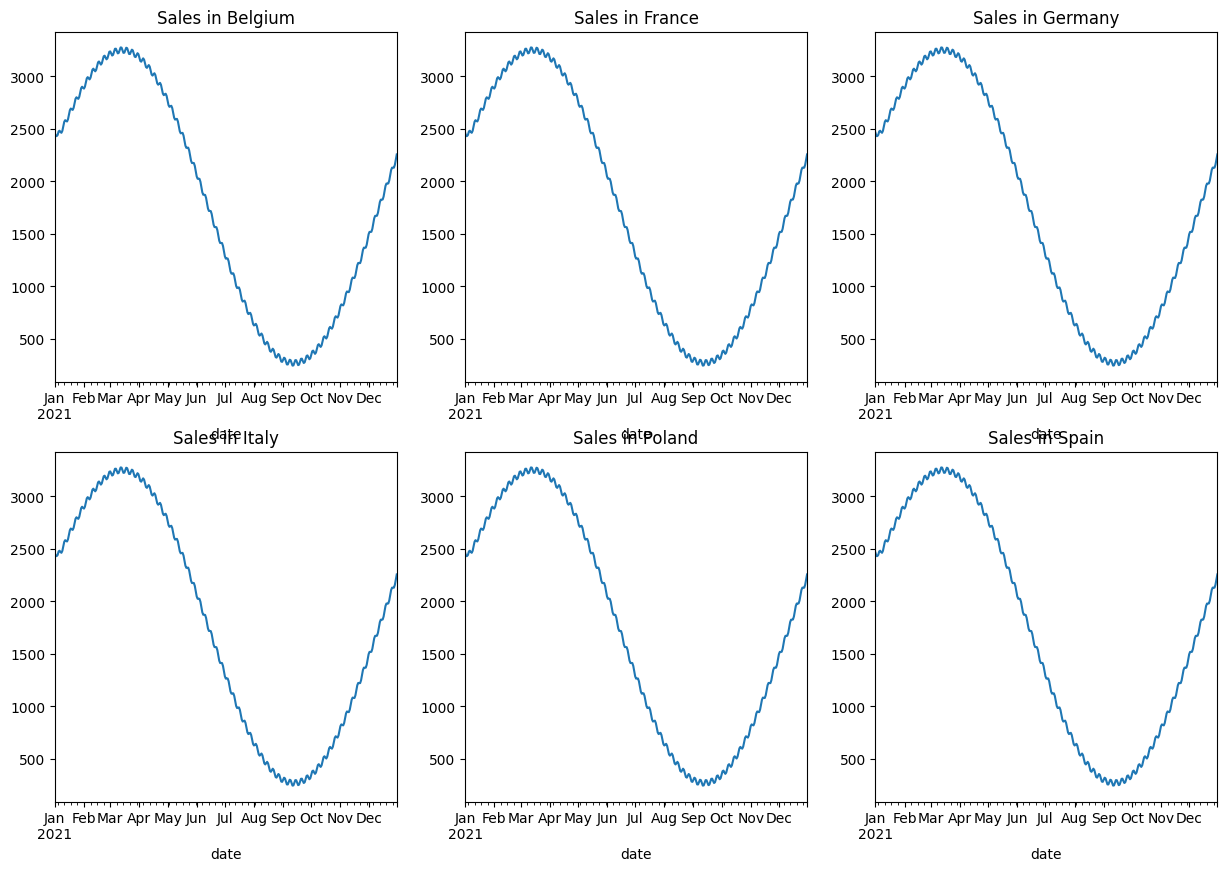

In [12]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes[0][0].set_title('Sales in Belgium')
axes[0][0].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Belgium']['num_sold'].plot(ax=axes[0][0])
axes[0][1].set_title('Sales in France')
axes[0][1].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'France']['num_sold'].plot(ax=axes[0][1])
axes[0][2].set_title('Sales in Germany')
axes[0][2].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Germany']['num_sold'].plot(ax=axes[0][2])
axes[1][0].set_title('Sales in Italy')
axes[1][0].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Italy']['num_sold'].plot(ax=axes[1][0])
axes[1][1].set_title('Sales in Poland')
axes[1][1].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Poland']['num_sold'].plot(ax=axes[1][1])
axes[1][2].set_title('Sales in Spain')
axes[1][2].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Spain']['num_sold'].plot(ax=axes[1][2])

In [13]:
def plot_sales_per_country(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['country'] == 'Belgium']['num_sold'].plot(label='Belgium')
    df[df['country'] == 'France']['num_sold'].plot(label='France')
    df[df['country'] == 'Germany']['num_sold'].plot(label='Germany')
    df[df['country'] == 'Italy']['num_sold'].plot(label='Italy')
    df[df['country'] == 'Poland']['num_sold'].plot(label='Poland')
    df[df['country'] == 'Spain']['num_sold'].plot(label='Spain')
    plt.legend()
    plt.title("Sales per country")
    plt.xlabel("date")
    plt.show()

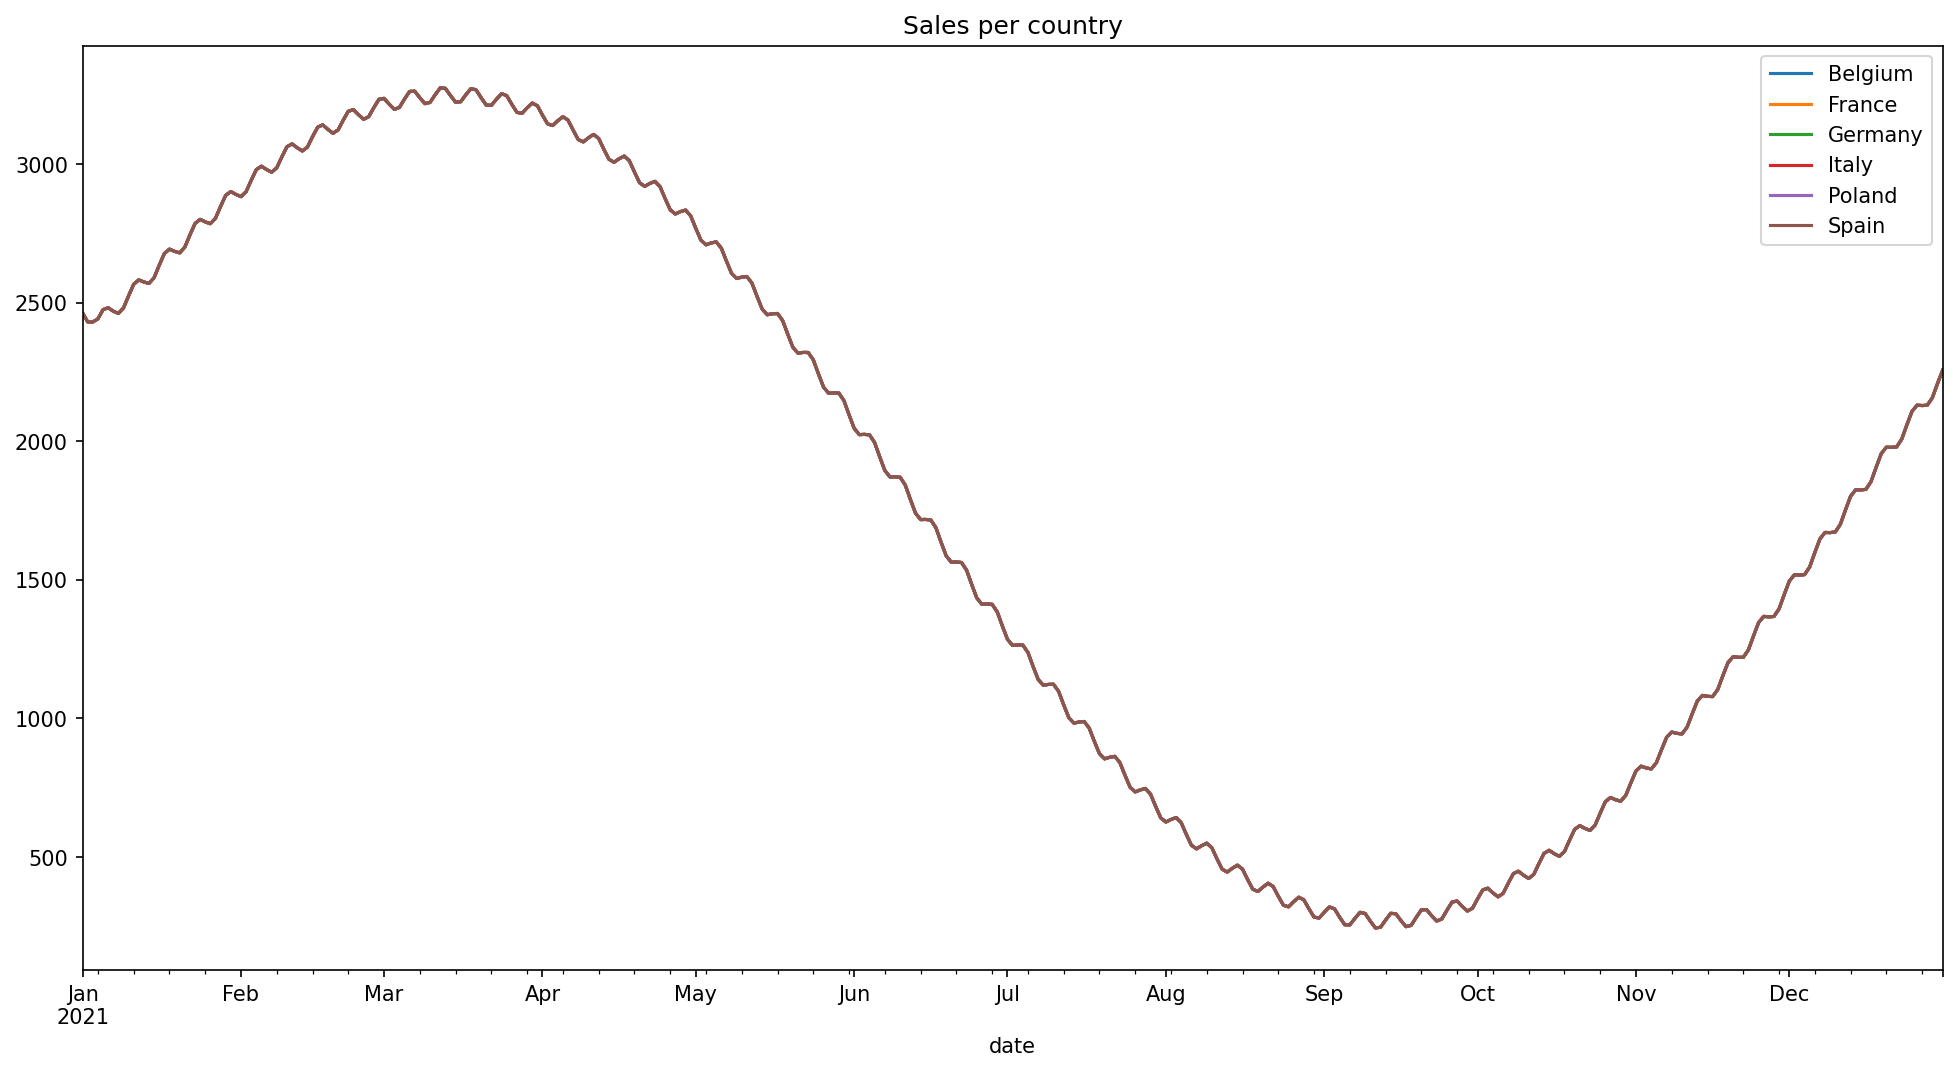

In [14]:
plot_sales_per_country(sales_per_country)

In [15]:
# Inspect one year
sales_per_country = sales_per_country.reset_index()
sales_per_country_2017 = sales_per_country[sales_per_country['date'] < pd.Timestamp("2018-01-01")]
sales_per_country_2020 = sales_per_country[sales_per_country['date'] > pd.Timestamp("2019-12-01")]
sales_per_country_2017_january = sales_per_country[sales_per_country['date'] < pd.Timestamp("2017-02-01")]
sales_per_country_2017_january.set_index('date', inplace=True)
sales_per_country_2017.set_index('date', inplace=True)
sales_per_country_2020.set_index('date', inplace=True)

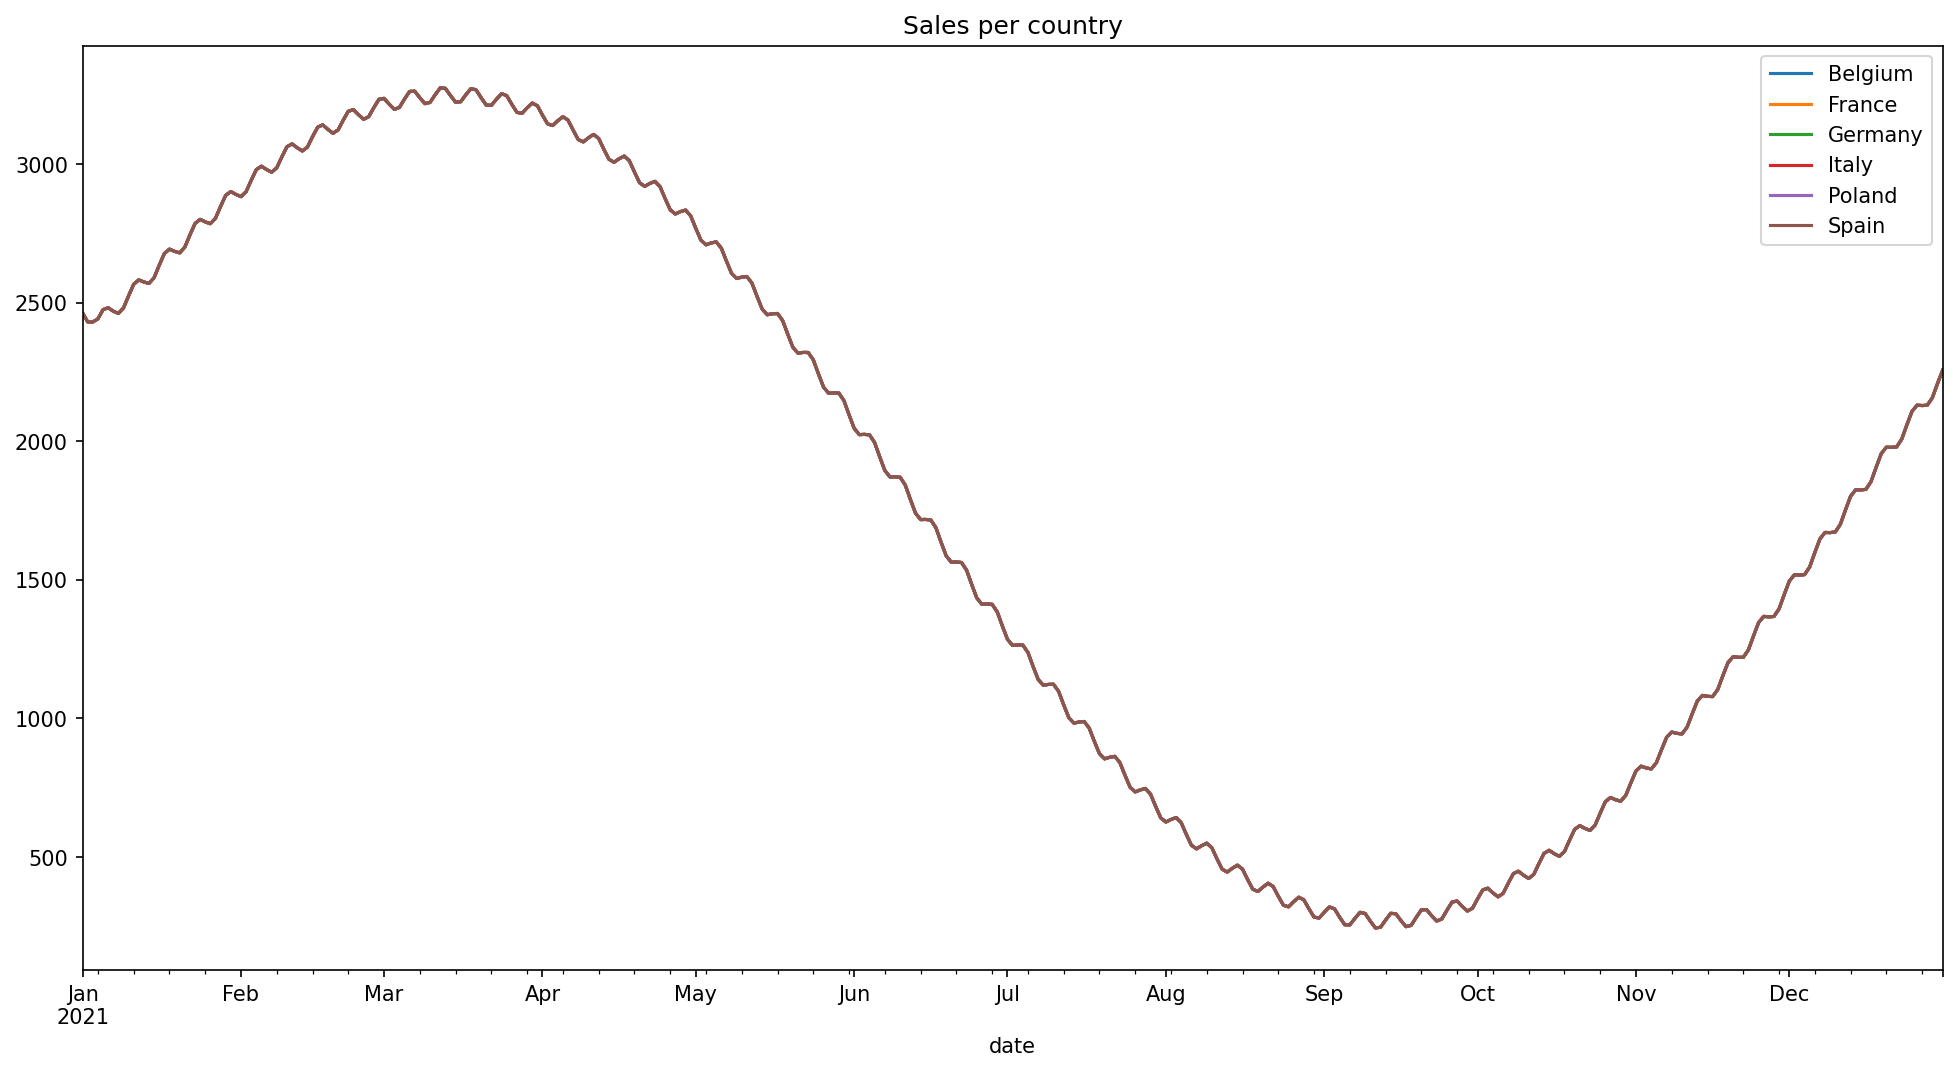

In [17]:
plot_sales_per_country(sales_per_country_2020)

##### Autocorrelation

### b) Sales country & individual product

<b>❗ Insights</b> :
- Insides from before are confirmed again
- In the years leading up to 2020 each country has a different distribution
- From 2020 the country does not have an impact, the products to.
<b> ❓ Questions </b>:
- Leave out the country informaiton as it does not carry any information for the model

In [18]:
product_sales_per_country = test_df.groupby(['date','country', 'product']).agg({
    'num_sold': 'sum',
}).reset_index()

# Fuse the two columns country & product
product_sales_per_country["product_by_country"] = product_sales_per_country["country"] + " - " + product_sales_per_country["product"]
product_sales_per_country.drop(["country", "product"], axis=1, inplace=True)

product_sales_per_country = product_sales_per_country.set_index('date')
product_sales_per_country.head(10)

num_sold                          product_by_country
date                                                              
2021-01-01  605.385809        Belgium - Kaggle Advanced Techniques
2021-01-01  809.361054            Belgium - Kaggle Getting Started
2021-01-01  399.043770                Belgium - Kaggle Recipe Book
2021-01-01  649.053246  Belgium - Kaggle for Kids: One Smart Goose
2021-01-01  605.385809         France - Kaggle Advanced Techniques
2021-01-01  809.361054             France - Kaggle Getting Started
2021-01-01  399.043770                 France - Kaggle Recipe Book
2021-01-01  649.053246   France - Kaggle for Kids: One Smart Goose
2021-01-01  605.385809        Germany - Kaggle Advanced Techniques
2021-01-01  809.361054            Germany - Kaggle Getting Started

In [19]:
products = train_df["product"].unique()

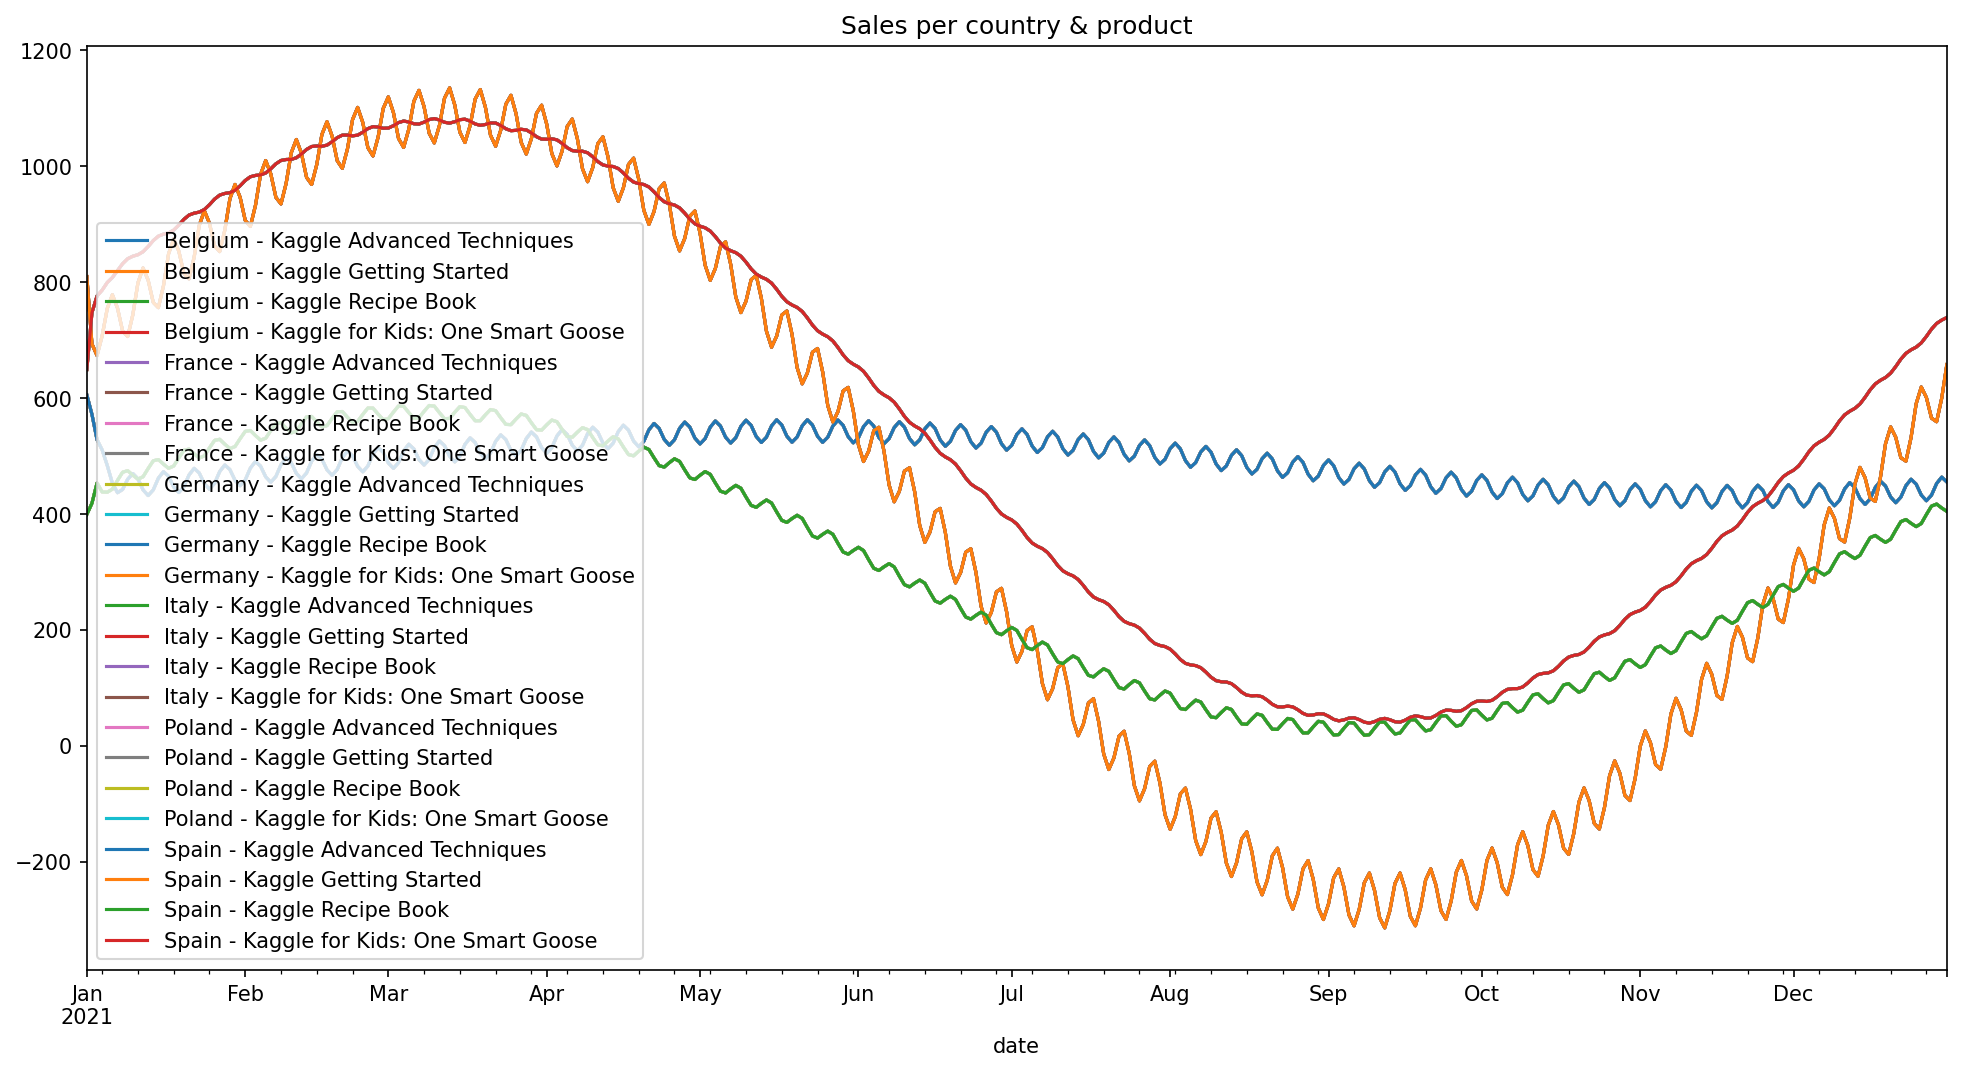

In [20]:
# All books in one plot where books have same color
plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country.product_by_country.unique():
    product_sales_per_country[product_sales_per_country['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination)
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

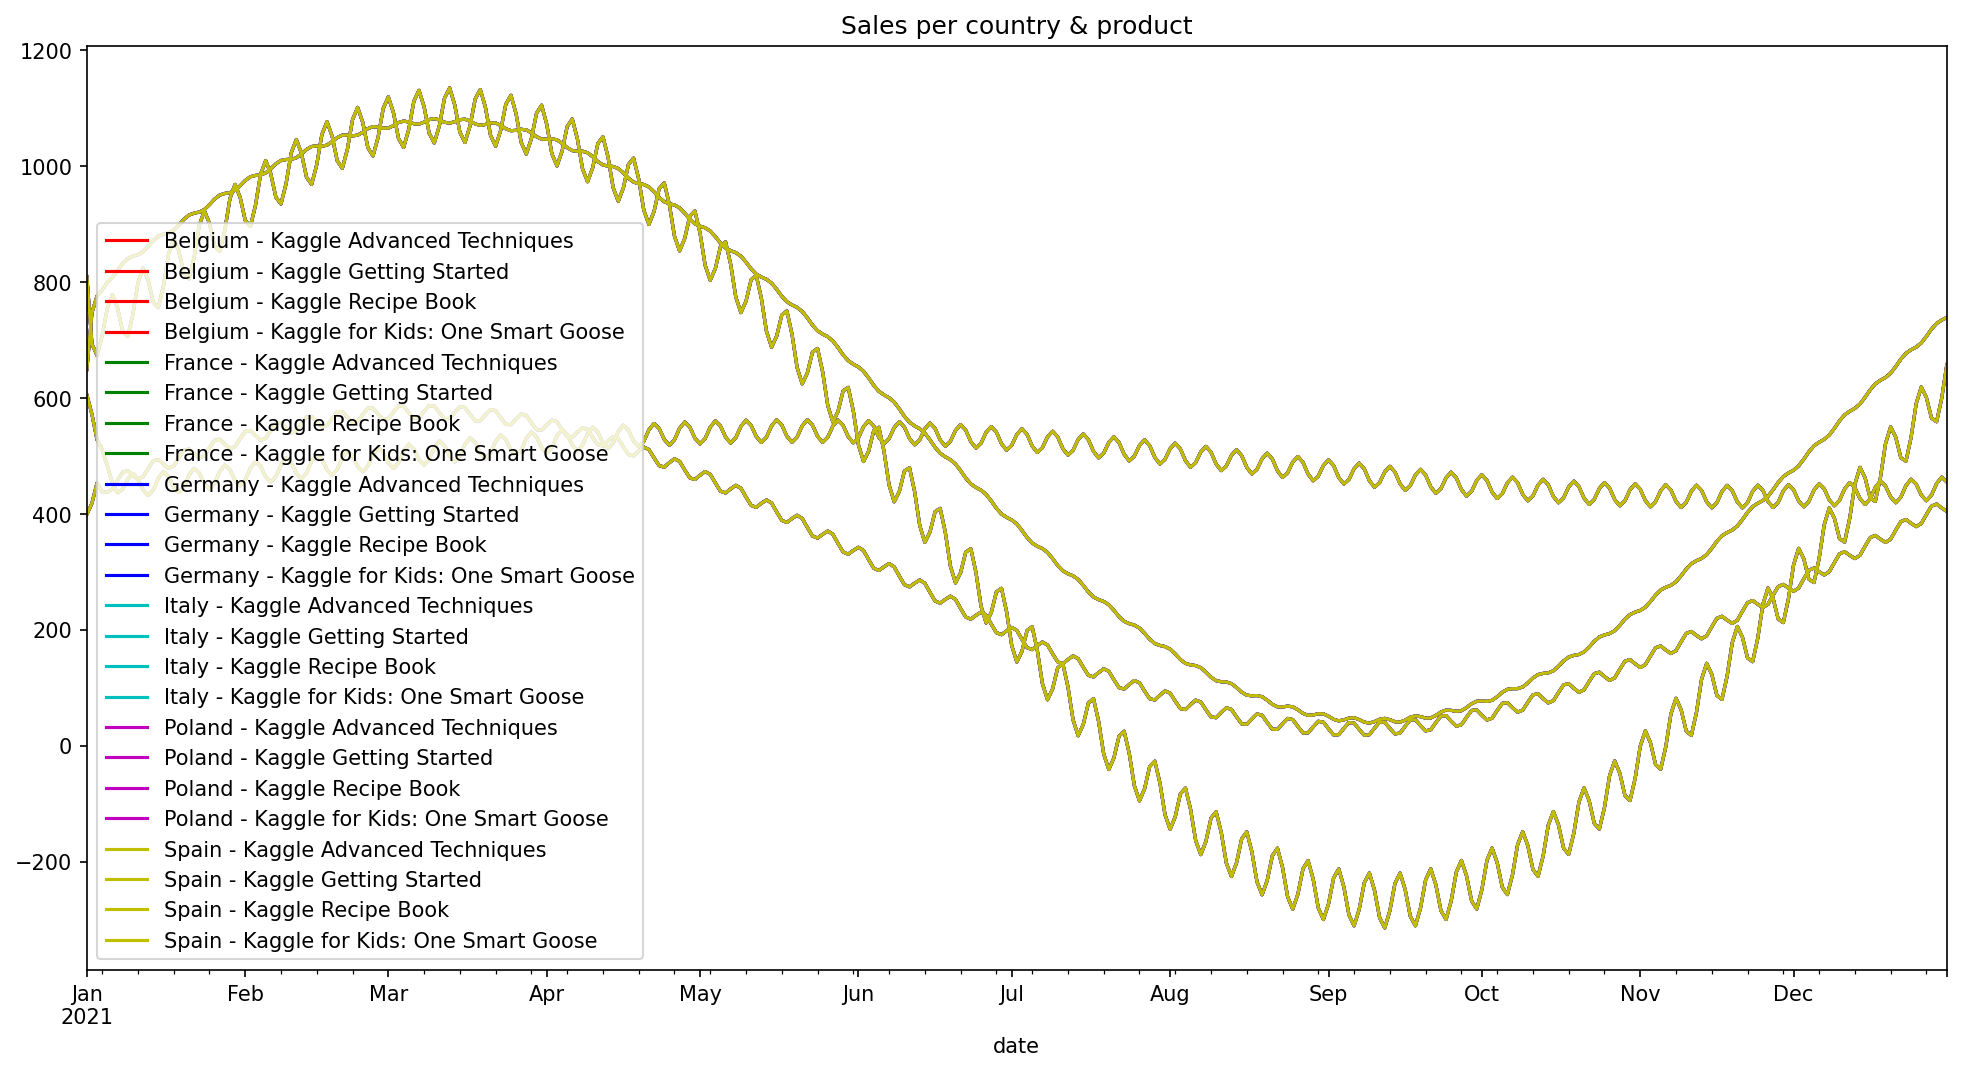

In [21]:
# Color countries the same
country_to_color = {}
countries = train_df.country.unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, country in enumerate(countries):
    country_to_color[country] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country.product_by_country.unique():
    product_sales_per_country[product_sales_per_country['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination, c = country_to_color[product_country_combination.split(" - ")[0]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

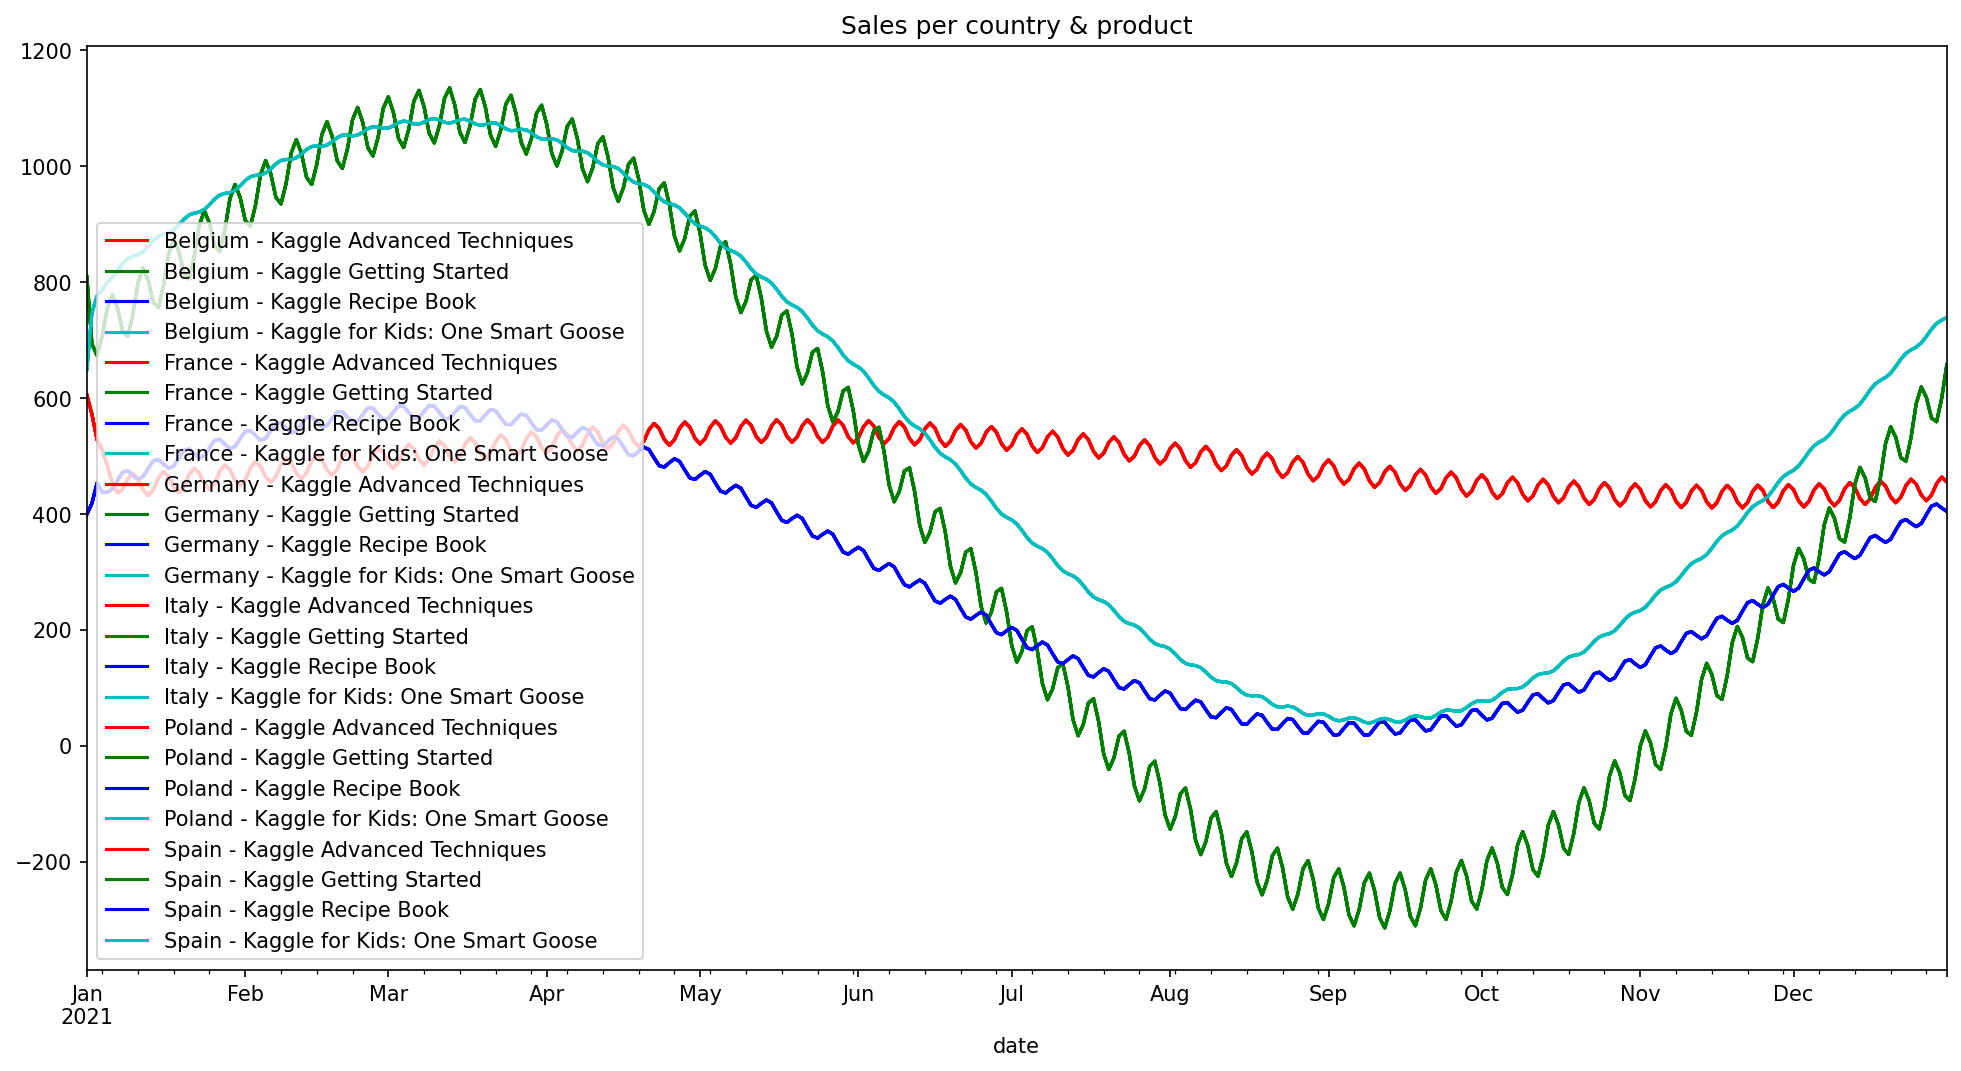

In [22]:
# Color products the same
product_to_color = {}
countries = train_df["product"].unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, product in enumerate(countries):
    product_to_color[product] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country.product_by_country.unique():
    product_sales_per_country[product_sales_per_country['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination, c = product_to_color[product_country_combination.split(" - ")[1]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

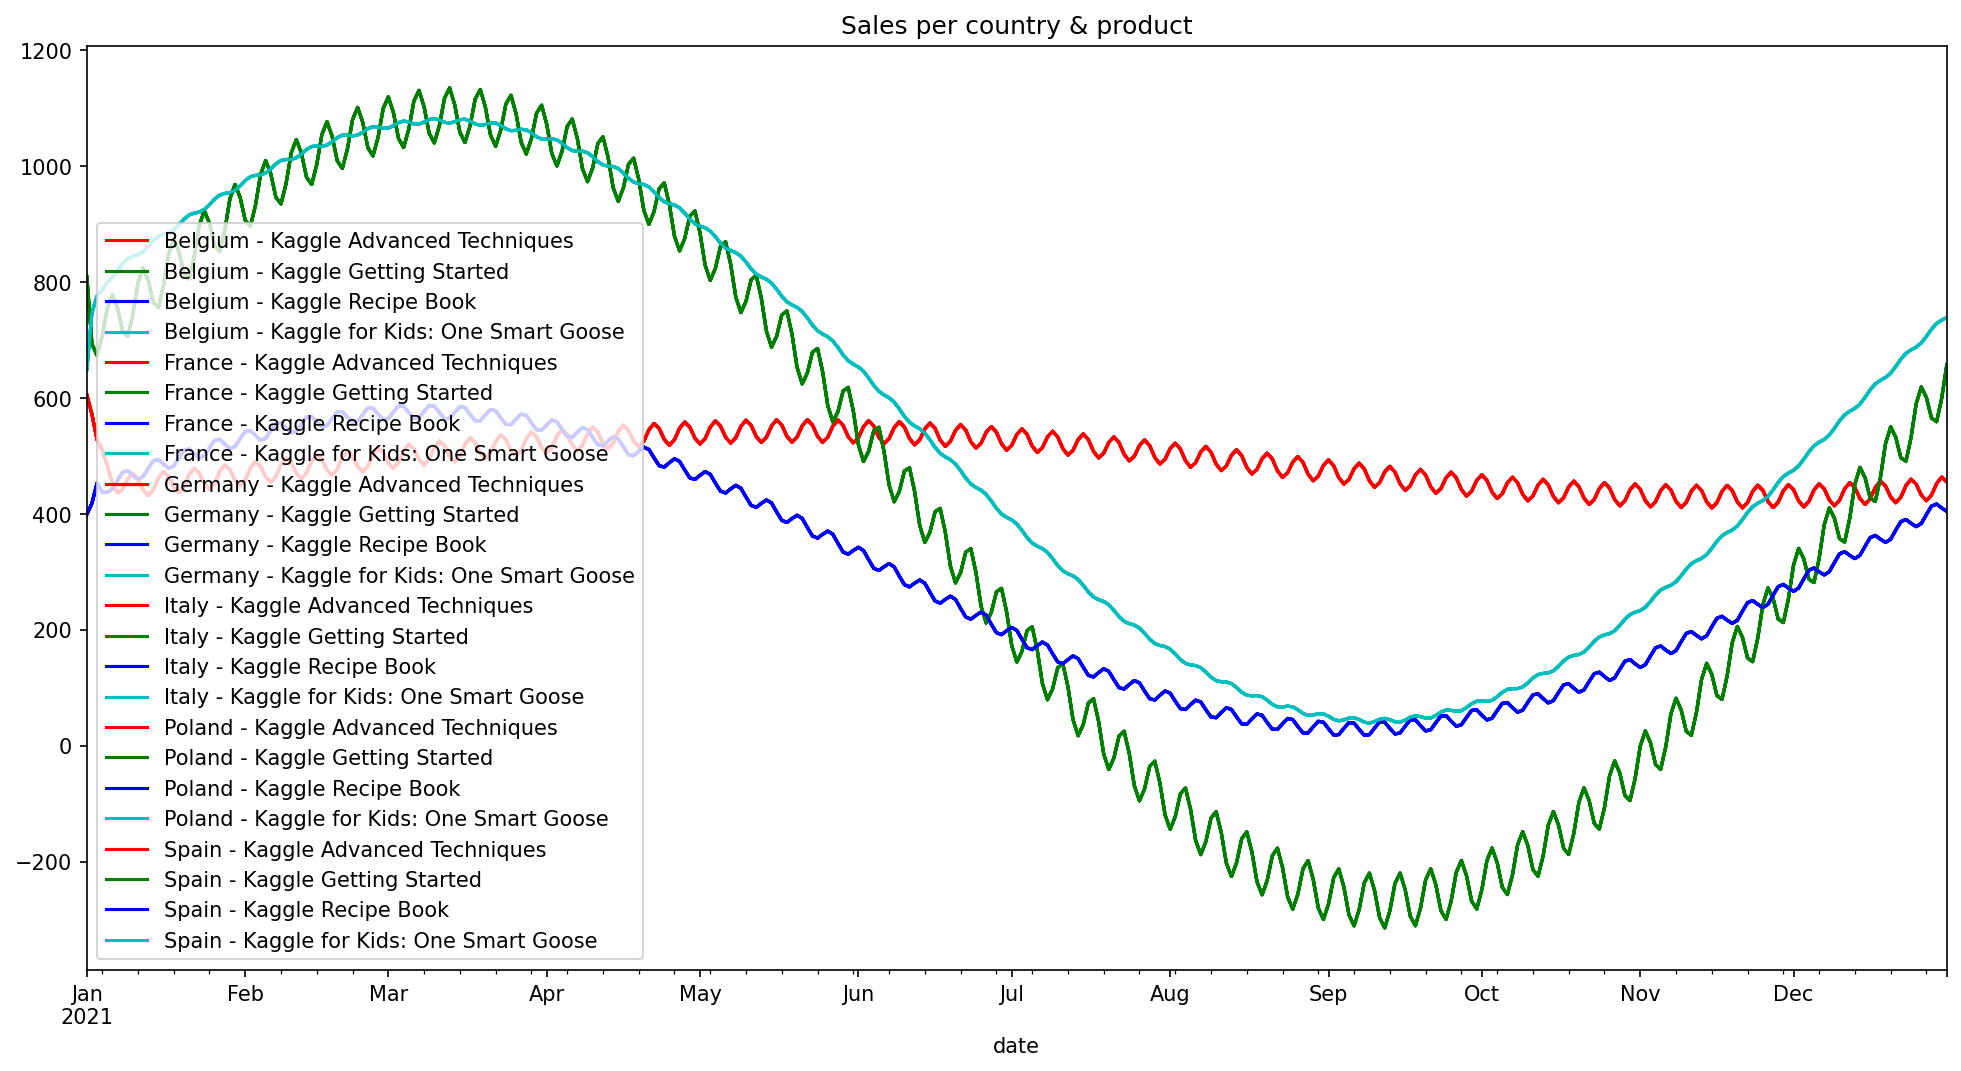

In [23]:
# Zoom in on 2020
product_sales_per_country.reset_index(inplace=True)
product_sales_per_country_2020 = product_sales_per_country[product_sales_per_country["date"] > pd.Timestamp("2019-12-30")]
product_sales_per_country_2020.set_index('date', inplace=True)

plt.figure(figsize=(16, 8), dpi=150)
for product_country_combination in product_sales_per_country_2020.product_by_country.unique():
    product_sales_per_country_2020[product_sales_per_country_2020['product_by_country'] == product_country_combination]['num_sold'].plot(label=product_country_combination, c = product_to_color[product_country_combination.split(" - ")[1]])
plt.legend()
plt.title("Sales per country & product")
plt.xlabel("date")
plt.show()

### c) Sales per store

<b>❗ Insights</b> :
- Change in data from year 2020 onward clearly visible. This is a new trend as can be seen by the decomposition. Also, seasonal fluctuations (weekly and yearly) don't change in 2020. This is clear from the not significantly higher residual values in 2020.
- The two shops are almost perfectly correlated even in 2020. Given one book store we should be able to predict the other one by a simple multiplication and some noise.

<b> ❓ Questions </b>:
- How is the behaviour in each country? Also almost perfectly correlated?
- Is there any benefit to use the additional datapoints for the second book store as the datapoints are basically perfectly correlated across time?

In [24]:
sales_per_store = test_df.groupby(['date','store']).agg({
    'num_sold': 'sum',
}).reset_index()
sales_per_store = sales_per_store.set_index('date')
sales_per_store.head(10)

store      num_sold
date                                
2021-01-01  KaggleMart  10966.440046
2021-01-01  KaggleRama   3810.623222
2021-01-02  KaggleMart  10826.989156
2021-01-02  KaggleRama   3756.903122
2021-01-03  KaggleMart  10826.628150
2021-01-03  KaggleRama   3756.010530
2021-01-04  KaggleMart  10874.596143
2021-01-04  KaggleRama   3774.042334
2021-01-05  KaggleMart  11021.295201
2021-01-05  KaggleRama   3826.735784

In [25]:
def plot_sales_per_store(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['store'] == 'KaggleMart']['num_sold'].plot(label='KaggleMart')
    df[df['store'] == 'KaggleRama']['num_sold'].plot(label='KaggleRama')
    plt.legend()
    plt.title("Sales per store")
    plt.xlabel("date")
    plt.show()

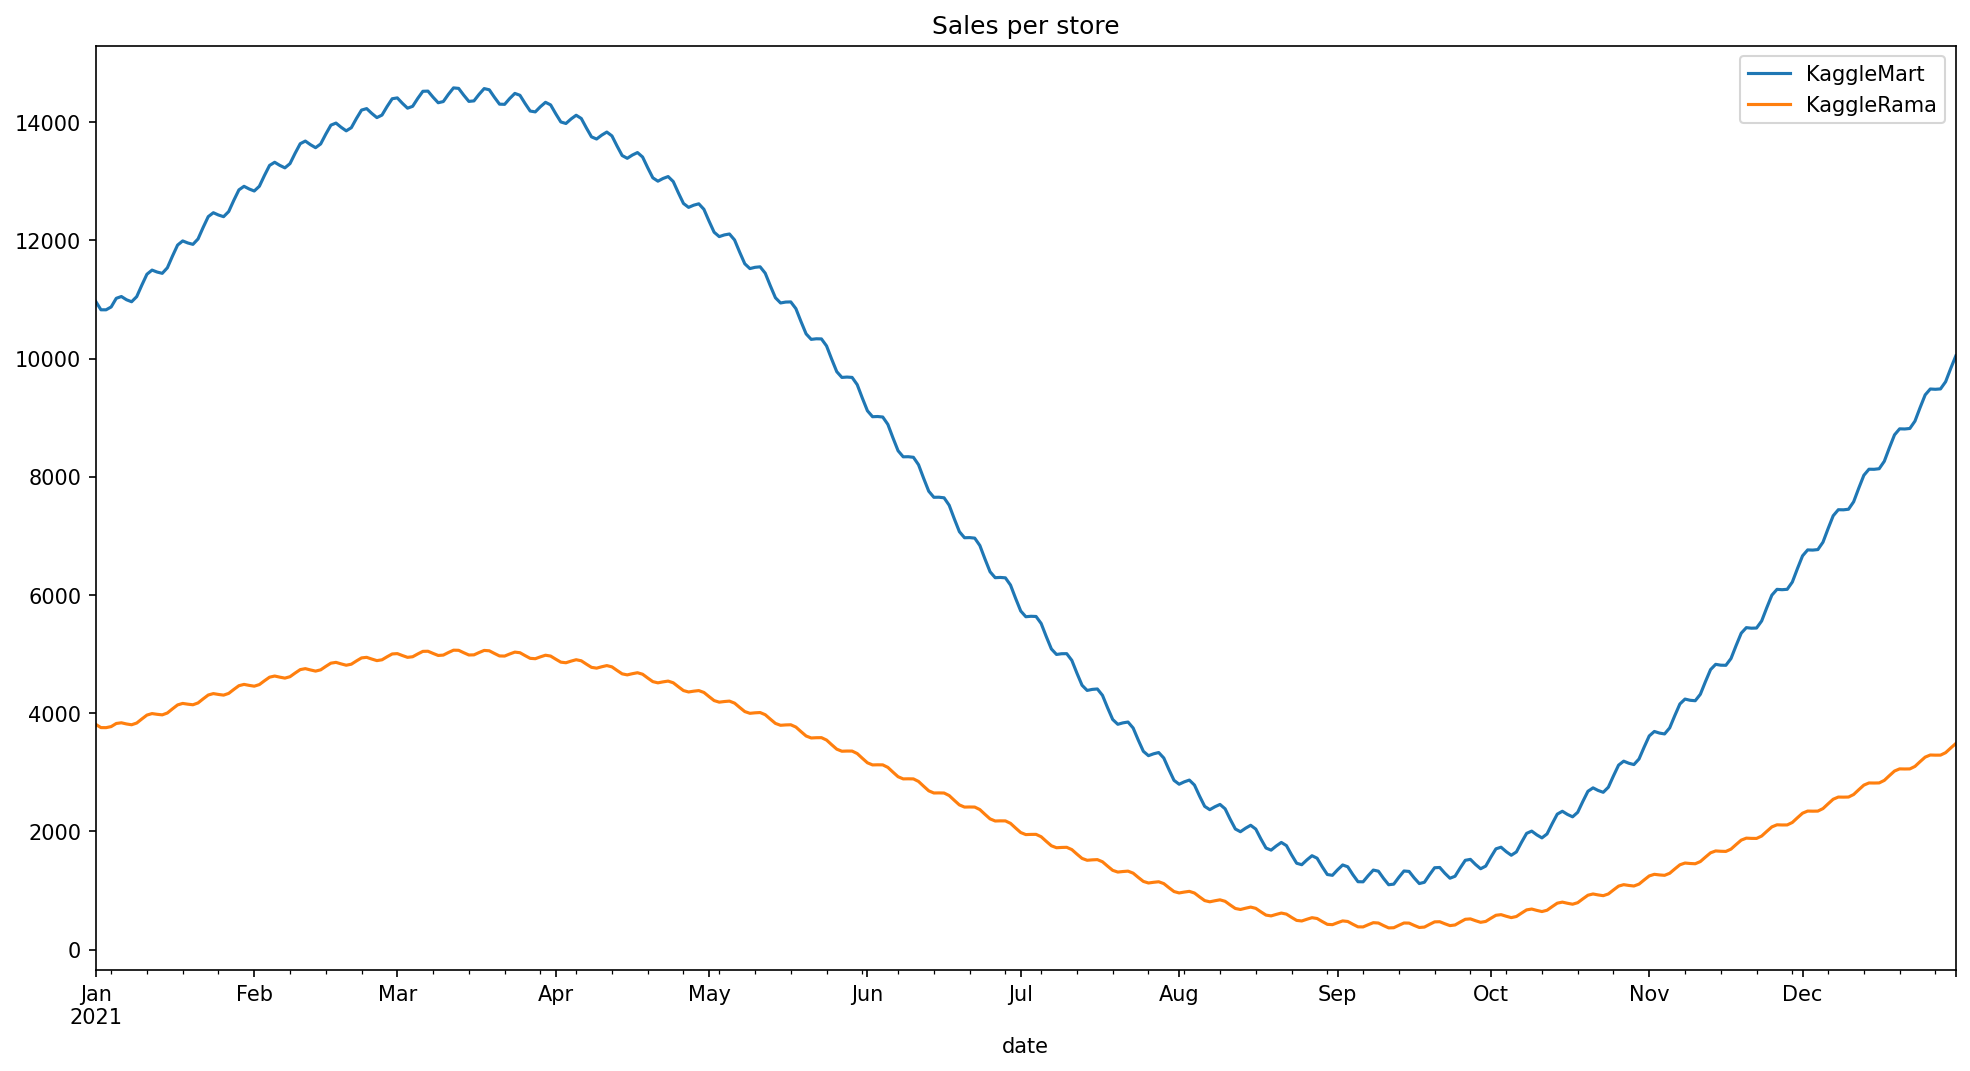

In [26]:
plot_sales_per_store(sales_per_store)

##### Correlation between time series

In [27]:
sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'].corr(sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold'])

0.9999996941788033

In [28]:
mean_div_coeff = (sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']).mean()
std_div_coeff = (sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']).std()
print(f"Mean division coeff = {mean_div_coeff} and std = {std_div_coeff} across time.")

Mean division coeff = 2.898359594139998 and std = 0.02724930253842508 across time.


Text(0.5, 1.0, 'Deviation from mean division coefficient over 4 years')

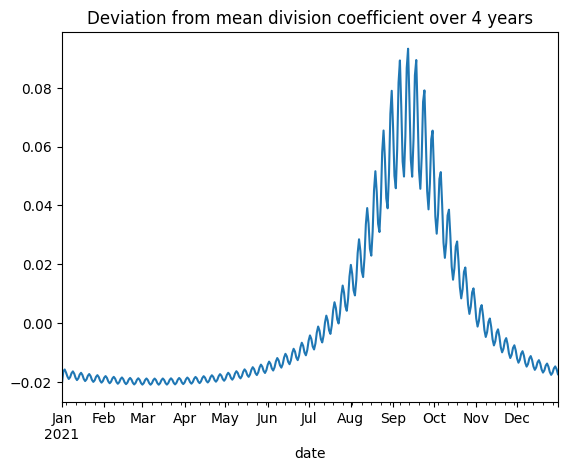

In [29]:
dev_plot = ((sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']) - mean_div_coeff).plot()
dev_plot.set_title("Deviation from mean division coefficient over 4 years")

##### Decomposition of sales for one of the two highly correlated book stores.

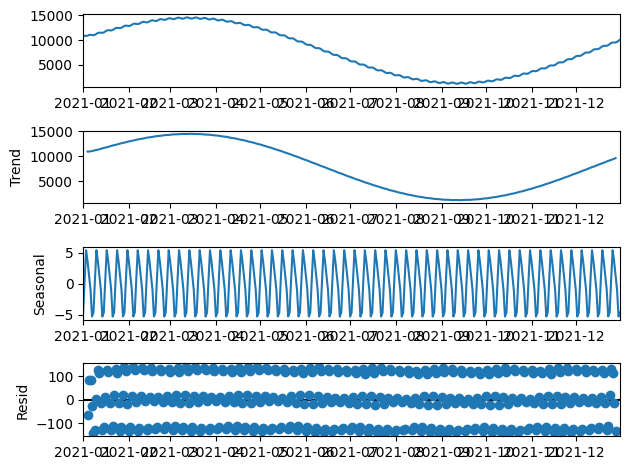

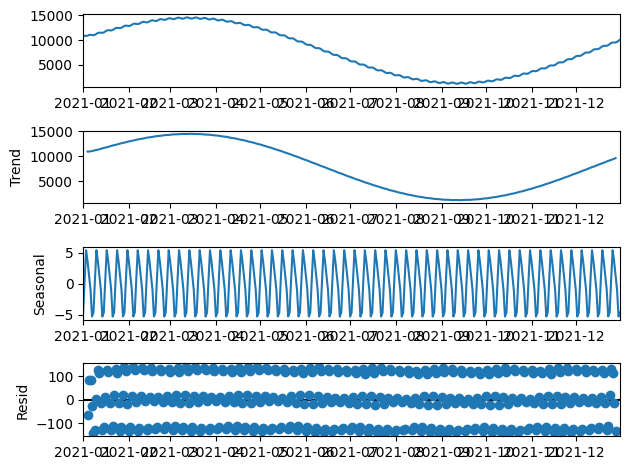

In [30]:
seasonal_decompose(sales_per_store[sales_per_store["store"] == 'KaggleMart'].drop(["store"], axis=1), model="additive").plot()

### d) Indvidual book sales per store

<b>❗ Insights</b> :
- Information about the store does not seem to hold any additional value as it is almost perfectly correlated. Only difference is noise which cannot be predicted.
- This dependency also holds for 2020

<b> ❓ Questions </b>:
- Is this still true if we don't sum over all countries? Are there differences in book store popularity between the countries?

In [32]:
product_sales_per_store = test_df.groupby(['date','store','product']).agg({
    'num_sold': 'sum',
}).reset_index()
product_sales_per_store = product_sales_per_store.set_index('date')
# Fuse the two columns
product_sales_per_store["product_by_store"] = product_sales_per_store["store"] + " - " + product_sales_per_store["product"]
product_sales_per_store.drop(["store", "product"], axis=1, inplace=True)
product_sales_per_store.head(10)

num_sold                               product_by_store
date                                                                  
2021-01-01  2699.673441        KaggleMart - Kaggle Advanced Techniques
2021-01-01  3595.336794            KaggleMart - Kaggle Getting Started
2021-01-01  1778.732946                KaggleMart - Kaggle Recipe Book
2021-01-01  2892.696865  KaggleMart - Kaggle for Kids: One Smart Goose
2021-01-01   932.641410        KaggleRama - Kaggle Advanced Techniques
2021-01-01  1260.829528            KaggleRama - Kaggle Getting Started
2021-01-01   615.529675                KaggleRama - Kaggle Recipe Book
2021-01-01  1001.622609  KaggleRama - Kaggle for Kids: One Smart Goose
2021-01-02  2549.363399        KaggleMart - Kaggle Advanced Techniques
2021-01-02  3081.057357            KaggleMart - Kaggle Getting Started

In [33]:
# All books in one plot where books have same color
def plot_product_sales_per_store(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['product_by_store'] == 'KaggleMart - Kaggle Advanced Techniques']['num_sold'].plot(label='KaggleMart - Kaggle Advanced Techniques', c="r")
    df[df['product_by_store'] == 'KaggleMart - Kaggle Getting Started']['num_sold'].plot(label='KaggleMart - Kaggle Getting Started', c="b")
    df[df['product_by_store'] == 'KaggleMart - Kaggle Recipe Book']['num_sold'].plot(label='KaggleMart - Kaggle Recipe Book', c="g")
    df[df['product_by_store'] == 'KaggleMart - Kaggle for Kids: One Smart Goose']['num_sold'].plot(label='KaggleMart - Kaggle for Kids: One Smart Goose', c="orange")
    df[df['product_by_store'] == 'KaggleRama - Kaggle Advanced Techniques']['num_sold'].plot(label='KaggleRama - Kaggle Advanced Techniques', c="r")
    df[df['product_by_store'] == 'KaggleRama - Kaggle Getting Started']['num_sold'].plot(label='KaggleRama - Kaggle Getting Started', c="b")
    df[df['product_by_store'] == 'KaggleRama - Kaggle Recipe Book']['num_sold'].plot(label='KaggleRama - Kaggle Recipe Book', c="g")
    df[df['product_by_store'] == 'KaggleRama - Kaggle for Kids: One Smart Goose']['num_sold'].plot(label='KaggleRama - Kaggle for Kids: One Smart Goose', c="orange")

    plt.legend()
    plt.title("Sales per store & books")
    plt.xlabel("date")
    plt.show()

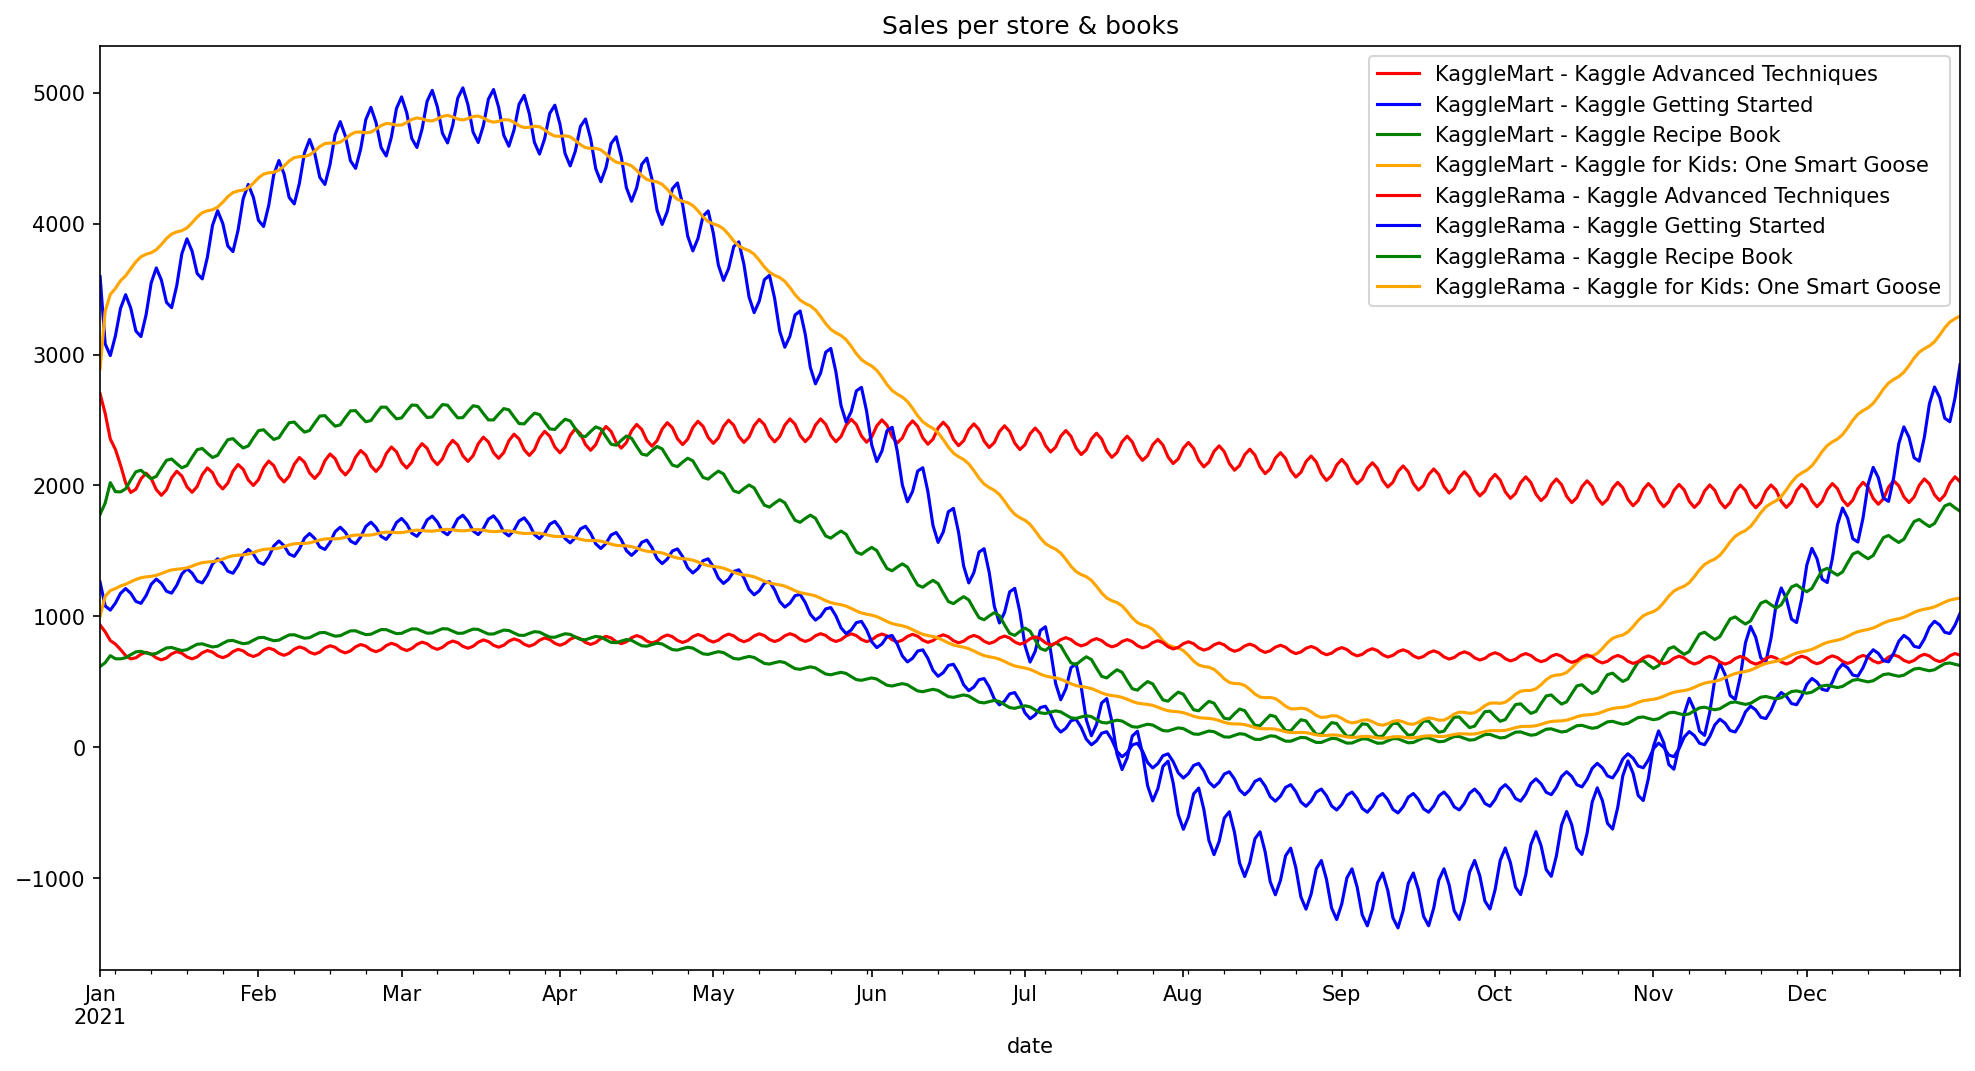

In [34]:
plot_product_sales_per_store(product_sales_per_store)

### Correlation between the individual books of the two shops

In [35]:
def calc_corr_and_const_factor(df):
    mart_book1 = df[df['product_by_store'] == 'KaggleMart - Kaggle Advanced Techniques']['num_sold']
    mart_book2 = df[df['product_by_store'] == 'KaggleMart - Kaggle Getting Started']['num_sold']
    mart_book3 = df[df['product_by_store'] == 'KaggleMart - Kaggle Recipe Book']['num_sold']
    mart_book4 = df[df['product_by_store'] == 'KaggleMart - Kaggle for Kids: One Smart Goose']['num_sold']
    rama_book1 = df[df['product_by_store'] == 'KaggleRama - Kaggle Advanced Techniques']['num_sold']
    rama_book2 = df[df['product_by_store'] == 'KaggleRama - Kaggle Getting Started']['num_sold']
    rama_book3 = df[df['product_by_store'] == 'KaggleRama - Kaggle Recipe Book']['num_sold']
    rama_book4 = df[df['product_by_store'] == 'KaggleRama - Kaggle for Kids: One Smart Goose']['num_sold']
    print(f"Corr for book 1 between two stores: {mart_book1.corr(rama_book1)}")
    print(f"Corr for book 2 between two stores: {mart_book2.corr(rama_book2)}")
    print(f"Corr for book 3 between two stores: {mart_book3.corr(rama_book3)}")
    print(f"Corr for book 4 between two stores: {mart_book4.corr(rama_book4)}")
    print(f"Constant factor for book 1 sales between the two stores: {(mart_book1 / rama_book1).mean()}")
    print(f"Constant factor for book 2 sales between the two stores: {(mart_book2 / rama_book2).mean()}")
    print(f"Constant factor for book 3 sales between the two stores: {(mart_book3 / rama_book3).mean()}")
    print(f"Constant factor for book 4 sales between the two stores: {(mart_book4 / rama_book4).mean()}")


In [36]:
calc_corr_and_const_factor(product_sales_per_store)

Corr for book 1 between two stores: 1.0
Corr for book 2 between two stores: 0.9999999999999999
Corr for book 3 between two stores: 0.9999999999999998
Corr for book 4 between two stores: 1.0
Constant factor for book 1 sales between the two stores: 2.889368648035411
Constant factor for book 2 sales between the two stores: 2.757022581584599
Constant factor for book 3 sales between the two stores: 2.868532155636728
Constant factor for book 4 sales between the two stores: 2.8306672411042078


### What about the time after 2020?

In [37]:
product_sales_per_store.reset_index(inplace=True)
product_sales_per_store_2020 = product_sales_per_store[product_sales_per_store["date"] > pd.Timestamp("2019-12-01")]
product_sales_per_store_2020.set_index('date', inplace=True)

In [38]:
calc_corr_and_const_factor(product_sales_per_store_2020)

Corr for book 1 between two stores: 1.0
Corr for book 2 between two stores: 0.9999999999999999
Corr for book 3 between two stores: 0.9999999999999998
Corr for book 4 between two stores: 1.0
Constant factor for book 1 sales between the two stores: 2.889368648035411
Constant factor for book 2 sales between the two stores: 2.757022581584599
Constant factor for book 3 sales between the two stores: 2.868532155636728
Constant factor for book 4 sales between the two stores: 2.8306672411042078


💡 <b> Summing up so far </b>
- The data changes distribution and behaviour after the year 2020. The years leading up to 2020 aren't representative and might be confusing rather than helpful for the model
- Before 2020 every country has a different selling behavior. After 2020 these differences disappear. The products sell almost identically across all countries for that time period.
- The influence of shops does not seem to be important, only the product really matters. This can be seen by the high correlation between the same book beeing sold in different stores. There exists a constant factor between the two shops which is 2.88 for all 4 products! Therefore, by only focusing on one shop it could be possible to infer the other one.


### e) Sales per store & country


<b>❗ Insights</b> :
- Results were predictable from previous analysis:
    - Products sell the same across all countries after 2020. Difference lies in the shop we look at.
    - Again, the shops have a difference of 

<b> ❓ Questions </b>:

In [39]:
sales_per_country_store = test_df.groupby(['date','country', 'store']).agg({
    'num_sold': 'sum',
}).reset_index()
# Combine the two columns country & store
sales_per_country_store["country_and_store"] = sales_per_country_store["country"] + " - " + sales_per_country_store["store"]
sales_per_country_store.drop(["country", "store"], axis=1, inplace=True)
sales_per_country_store = sales_per_country_store.set_index('date')
sales_per_country_store.head(10)

num_sold     country_and_store
date                                         
2021-01-01  1827.740008  Belgium - KaggleMart
2021-01-01   635.103870  Belgium - KaggleRama
2021-01-01  1827.740008   France - KaggleMart
2021-01-01   635.103870   France - KaggleRama
2021-01-01  1827.740008  Germany - KaggleMart
2021-01-01   635.103870  Germany - KaggleRama
2021-01-01  1827.740008    Italy - KaggleMart
2021-01-01   635.103870    Italy - KaggleRama
2021-01-01  1827.740008   Poland - KaggleMart
2021-01-01   635.103870   Poland - KaggleRama

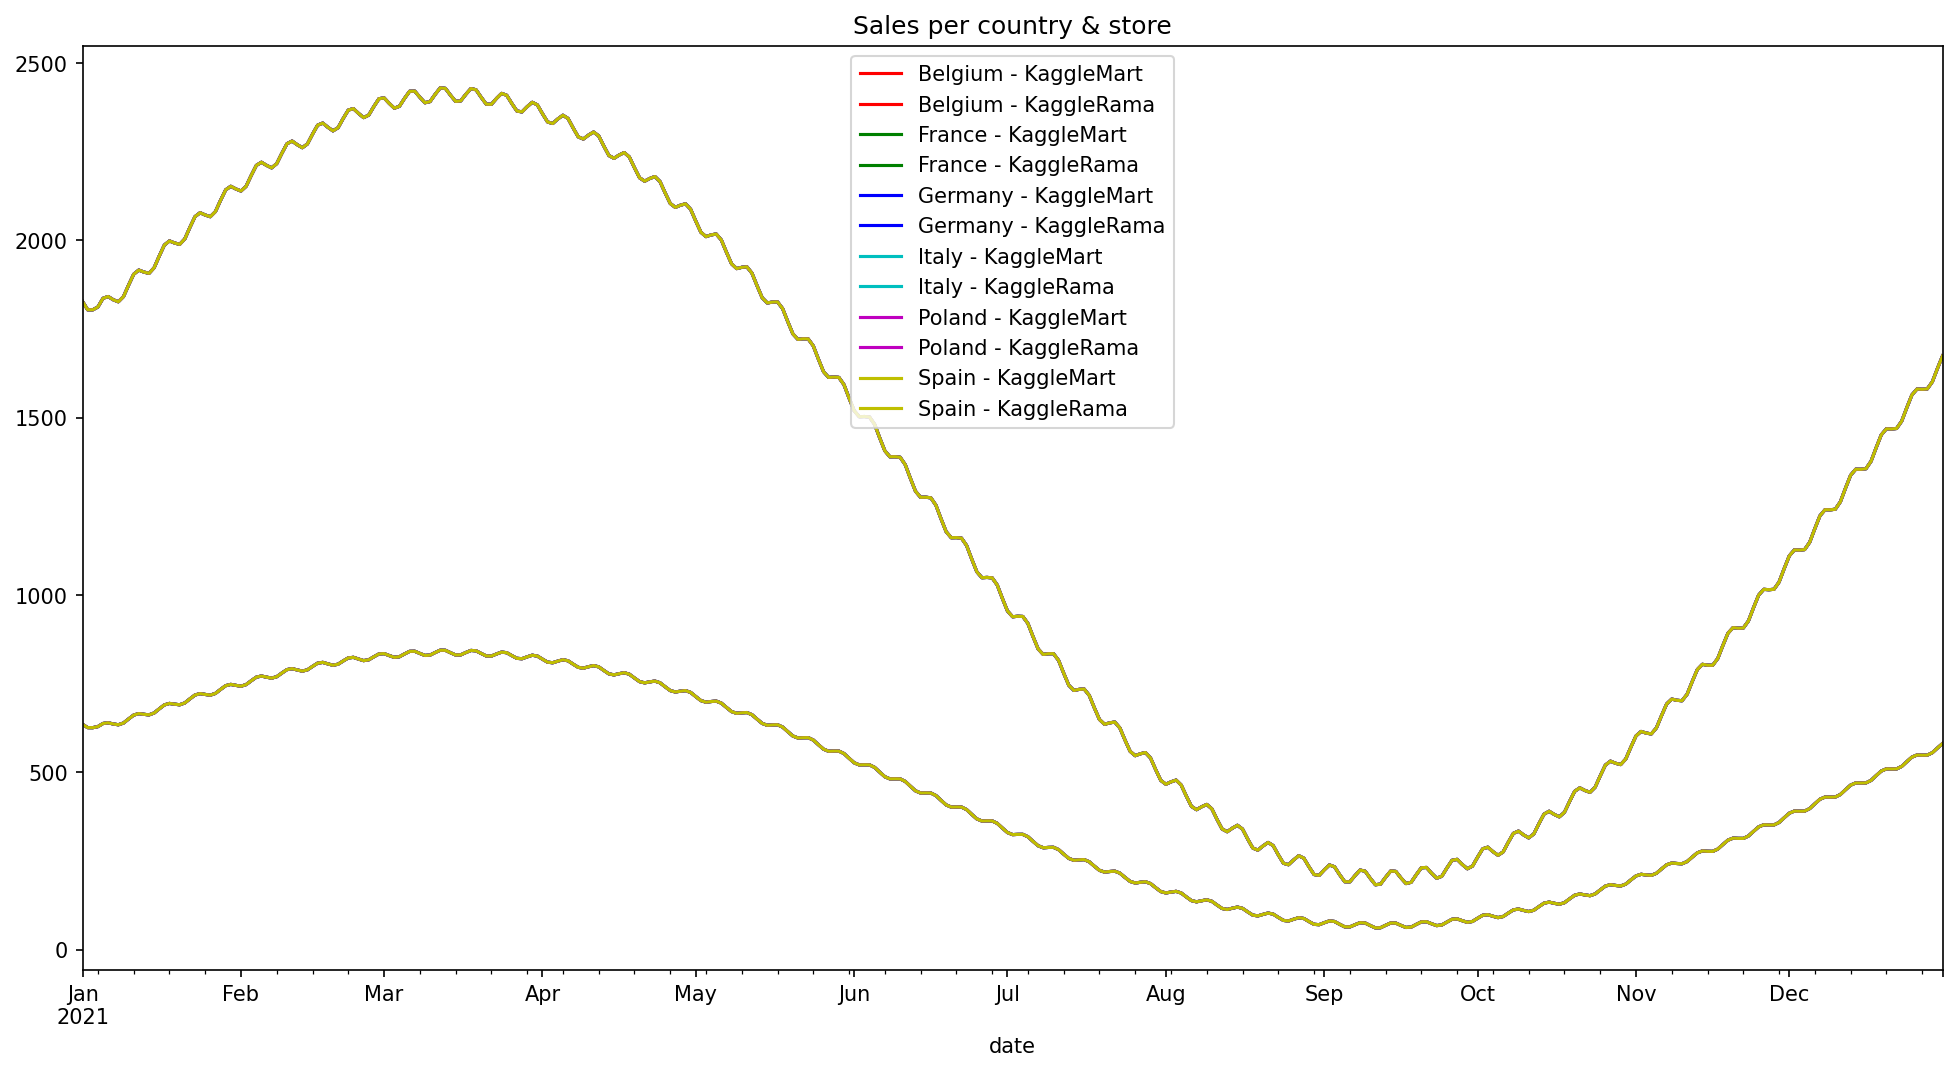

In [40]:
# Color countries the same
country_to_color = {}
countries = train_df["country"].unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, country in enumerate(countries):
    country_to_color[country] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for country_store_combination in sales_per_country_store.country_and_store.unique():
    sales_per_country_store[sales_per_country_store['country_and_store'] == country_store_combination]['num_sold'].plot(label=country_store_combination, c = country_to_color[country_store_combination.split(" - ")[0]])
plt.legend()
plt.title("Sales per country & store")
plt.xlabel("date")
plt.show()

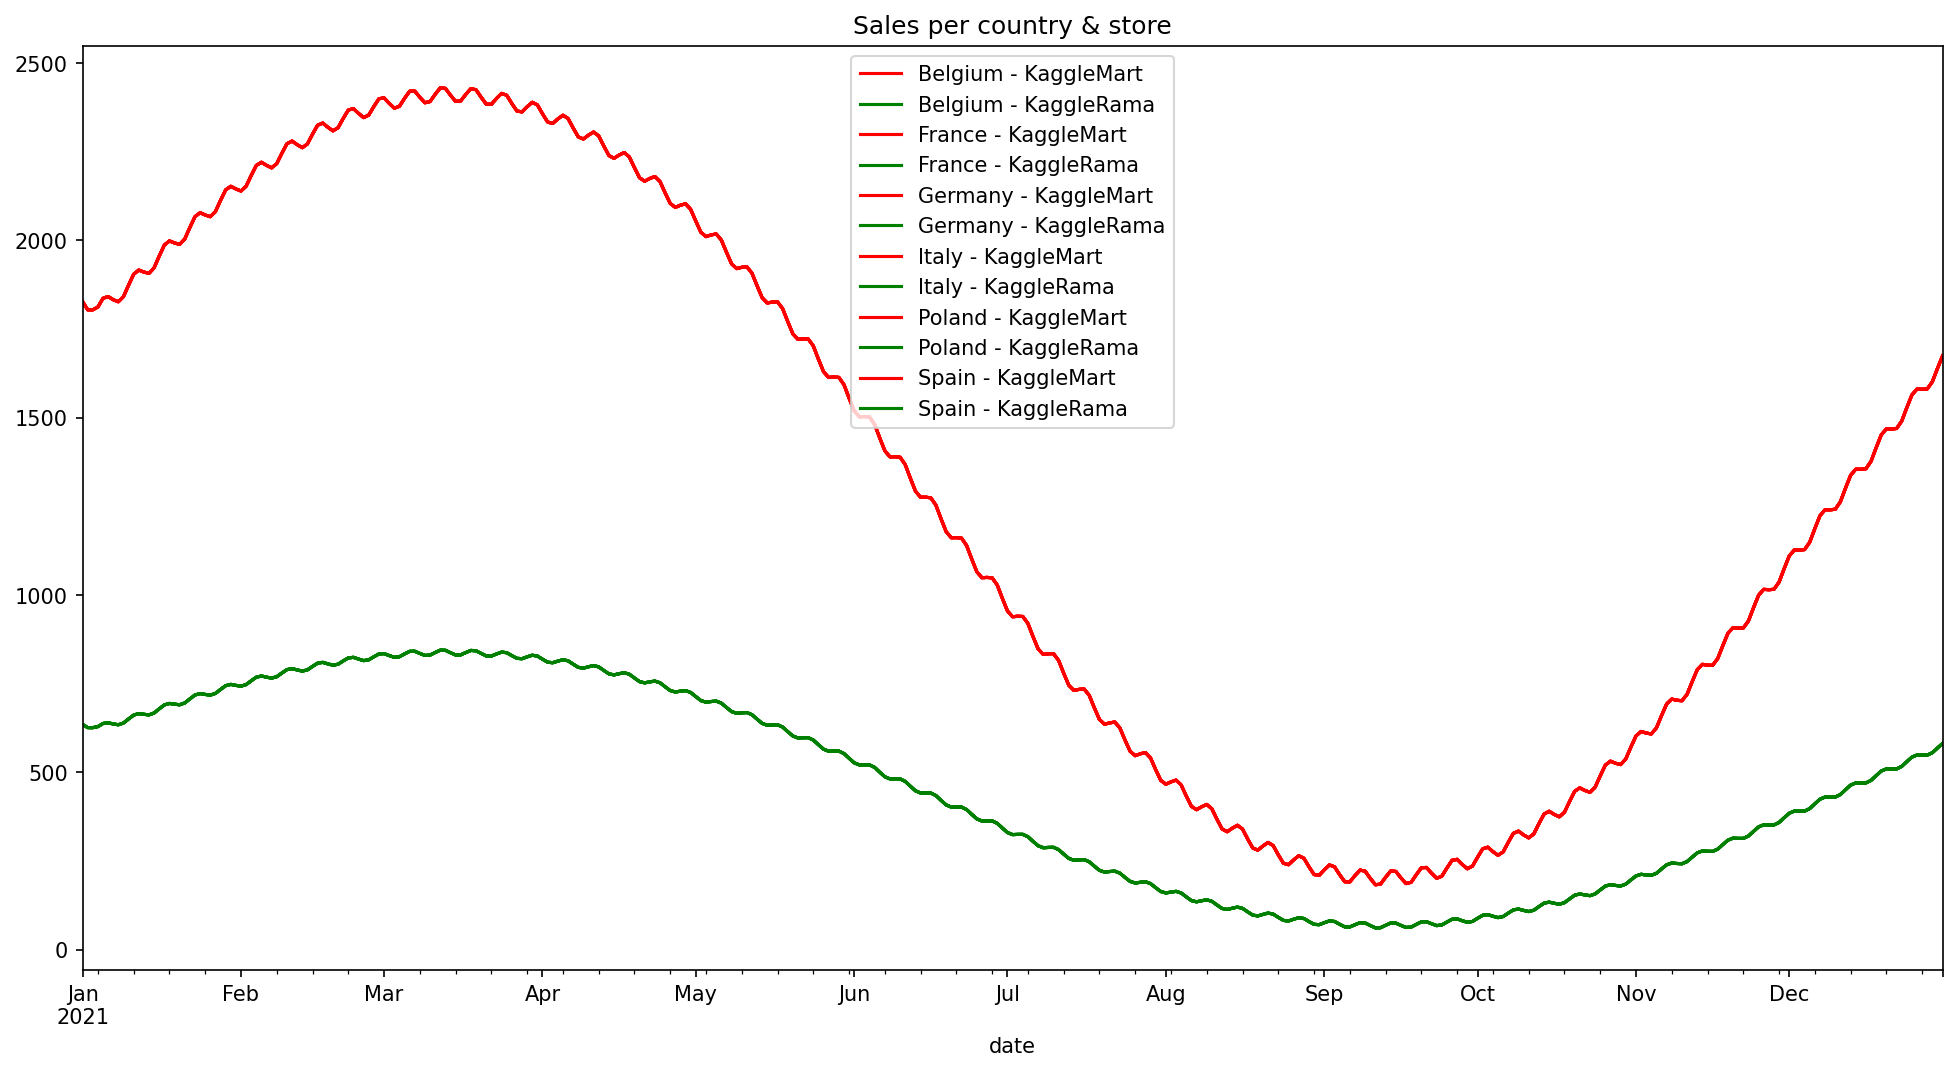

In [41]:
# Color store the same
store_to_color = {}
countries = train_df["store"].unique()
colors = ["r", "g"]
for idx, store in enumerate(countries):
    store_to_color[store] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for country_store_combination in sales_per_country_store.country_and_store.unique():
    sales_per_country_store[sales_per_country_store['country_and_store'] == country_store_combination]['num_sold'].plot(label=country_store_combination, c = store_to_color[country_store_combination.split(" - ")[1]])

plt.legend()
plt.title("Sales per country & store")
plt.xlabel("date")
plt.show()

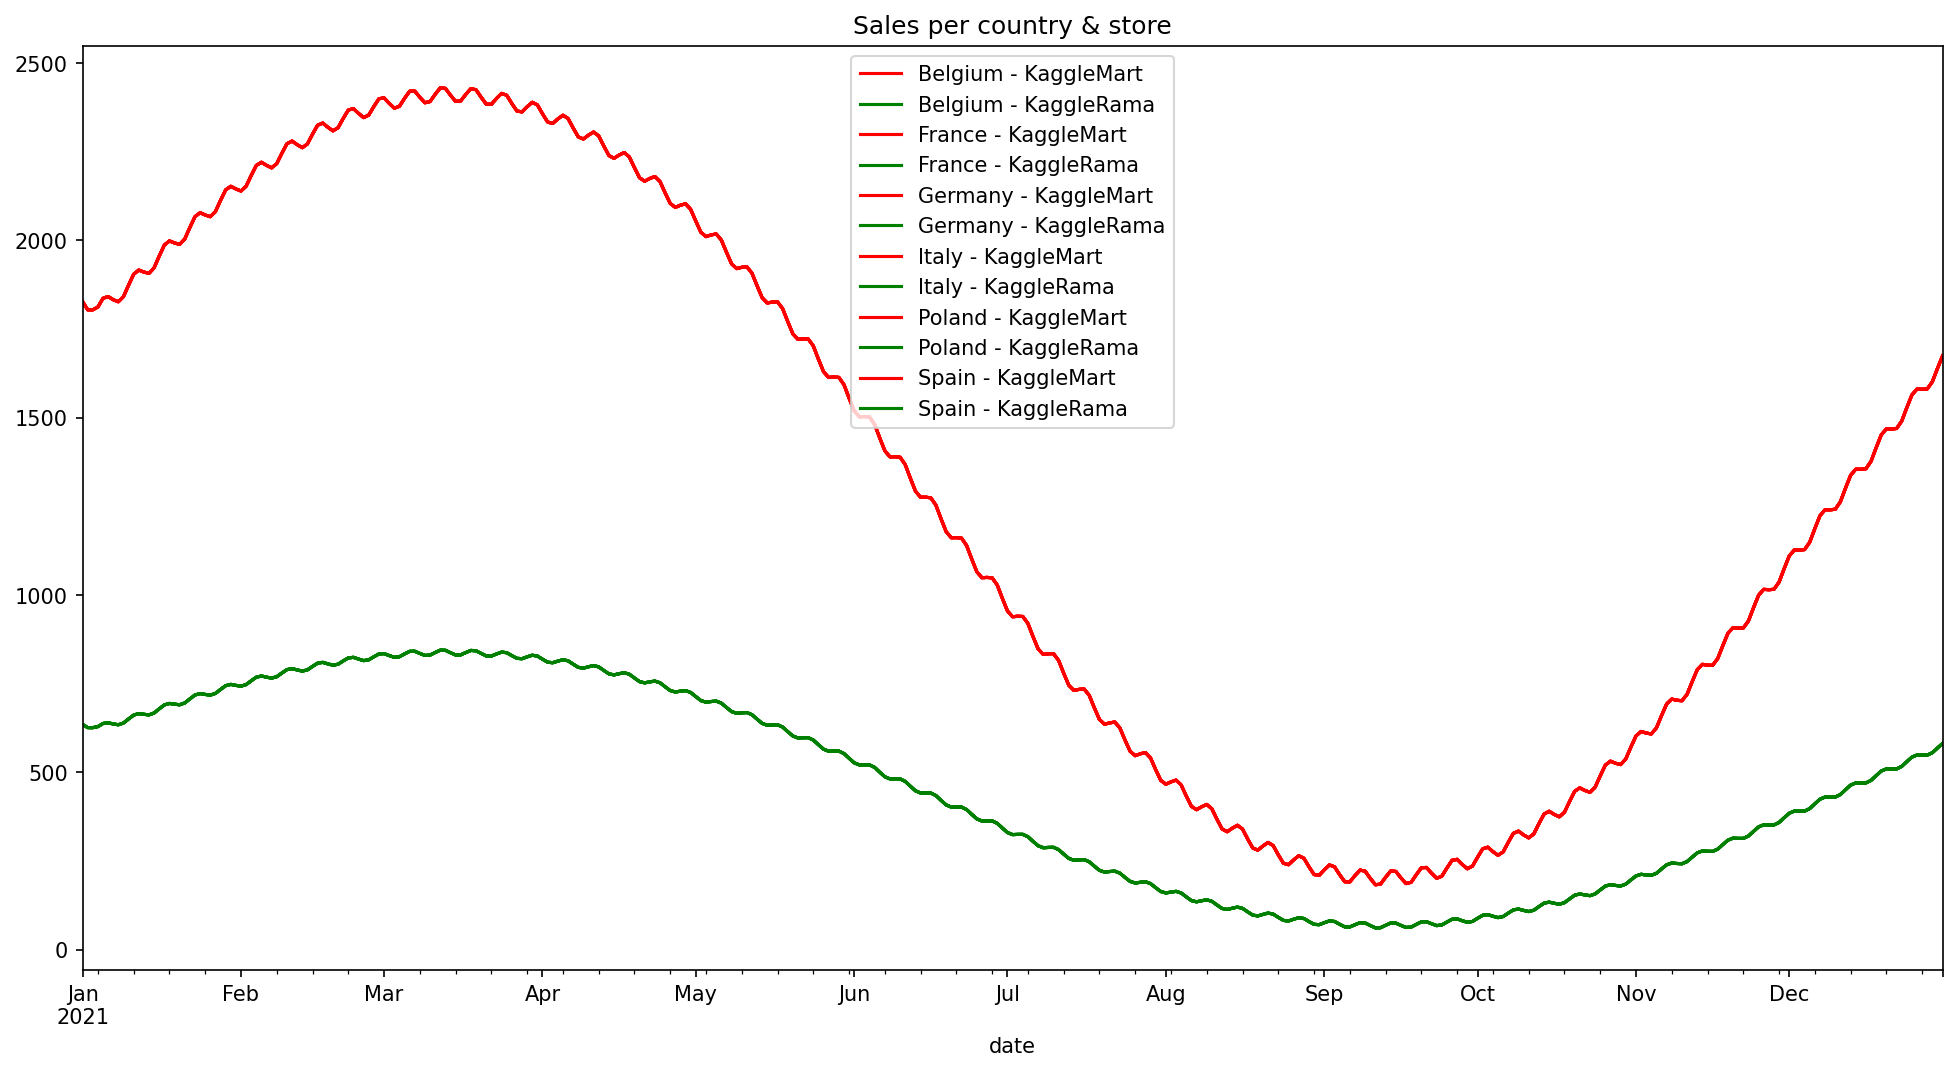

In [42]:
### Zoom in on 2020
# Color store the same
sales_per_country_store.reset_index(inplace=True)
sales_per_country_store_2020 = sales_per_country_store[sales_per_country_store["date"] > pd.Timestamp("2019-12-01")]
sales_per_country_store_2020.set_index('date', inplace=True)

plt.figure(figsize=(16, 8), dpi=150)
for country_store_combination in sales_per_country_store_2020.country_and_store.unique():
    sales_per_country_store_2020[sales_per_country_store_2020['country_and_store'] == country_store_combination]['num_sold'].plot(label=country_store_combination, c = store_to_color[country_store_combination.split(" - ")[1]])

plt.legend()
plt.title("Sales per country & store")
plt.xlabel("date")
plt.show()

In [43]:
shop_1 = sales_per_country_store_2020[sales_per_country_store_2020['country_and_store'].str.contains("KaggleMart")]['num_sold']
shop_2 = sales_per_country_store_2020[sales_per_country_store_2020['country_and_store'].str.contains("KaggleRama")]['num_sold']
print("Variance: ", shop_1.corr( shop_2))

Variance:  0.9999996941788027


In [44]:
shop_1 = sales_per_country_store_2020[sales_per_country_store_2020['country_and_store'].str.contains("KaggleMart")]['num_sold'].mean()
shop_2 = sales_per_country_store_2020[sales_per_country_store_2020['country_and_store'].str.contains("KaggleRama")]['num_sold'].mean()
print("Constant factor: ", shop_1 / shop_2)

Constant factor:  2.885035361425443


### e) Sales per store, country & product
<b> 🧮 Expected result: </b>

- Country should not have any influence after 2020, only product.
- There are two time series distributions for the same product depending on in which store it is sold in.

In [45]:
fused_df = test_df.copy(deep=True)

In [46]:
fused_df.set_index("date", inplace=True)
fused_df.head()

row_id  country       store                           product  \
date                                                                        
2021-01-01   70128  Belgium  KaggleMart        Kaggle Advanced Techniques   
2021-01-01   70129  Belgium  KaggleMart            Kaggle Getting Started   
2021-01-01   70130  Belgium  KaggleMart                Kaggle Recipe Book   
2021-01-01   70131  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
2021-01-01   70132  Belgium  KaggleRama        Kaggle Advanced Techniques   

            week_sin  week_cos  year_sin  year_cos    num_sold  
date                                                            
2021-01-01  0.866025      -0.5  0.068991  0.997617  449.945574  
2021-01-01  0.866025      -0.5  0.068991  0.997617  599.222799  
2021-01-01  0.866025      -0.5  0.068991  0.997617  296.455491  
2021-01-01  0.866025      -0.5  0.068991  0.997617  482.116144  
2021-01-01  0.866025      -0.5  0.068991  0.997617  155.440235

In [47]:
fused_df.drop(["row_id"], axis=1, inplace=True)
fused_df.head()

country       store                           product  week_sin  \
date                                                                          
2021-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques  0.866025   
2021-01-01  Belgium  KaggleMart            Kaggle Getting Started  0.866025   
2021-01-01  Belgium  KaggleMart                Kaggle Recipe Book  0.866025   
2021-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose  0.866025   
2021-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques  0.866025   

            week_cos  year_sin  year_cos    num_sold  
date                                                  
2021-01-01      -0.5  0.068991  0.997617  449.945574  
2021-01-01      -0.5  0.068991  0.997617  599.222799  
2021-01-01      -0.5  0.068991  0.997617  296.455491  
2021-01-01      -0.5  0.068991  0.997617  482.116144  
2021-01-01      -0.5  0.068991  0.997617  155.440235

In [48]:
fused_df["fused"] = fused_df["country"] + " - " + fused_df["store"] + " - " + fused_df["product"]
fused_df.drop(["country", "store", "product"], axis=1, inplace=True)
fused_df.head()

week_sin  week_cos  year_sin  year_cos    num_sold  \
date                                                             
2021-01-01  0.866025      -0.5  0.068991  0.997617  449.945574   
2021-01-01  0.866025      -0.5  0.068991  0.997617  599.222799   
2021-01-01  0.866025      -0.5  0.068991  0.997617  296.455491   
2021-01-01  0.866025      -0.5  0.068991  0.997617  482.116144   
2021-01-01  0.866025      -0.5  0.068991  0.997617  155.440235   

                                                        fused  
date                                                           
2021-01-01  Belgium - KaggleMart - Kaggle Advanced Techniques  
2021-01-01      Belgium - KaggleMart - Kaggle Getting Started  
2021-01-01          Belgium - KaggleMart - Kaggle Recipe Book  
2021-01-01  Belgium - KaggleMart - Kaggle for Kids: One Sm...  
2021-01-01  Belgium - KaggleRama - Kaggle Advanced Techniques

##### Color by store

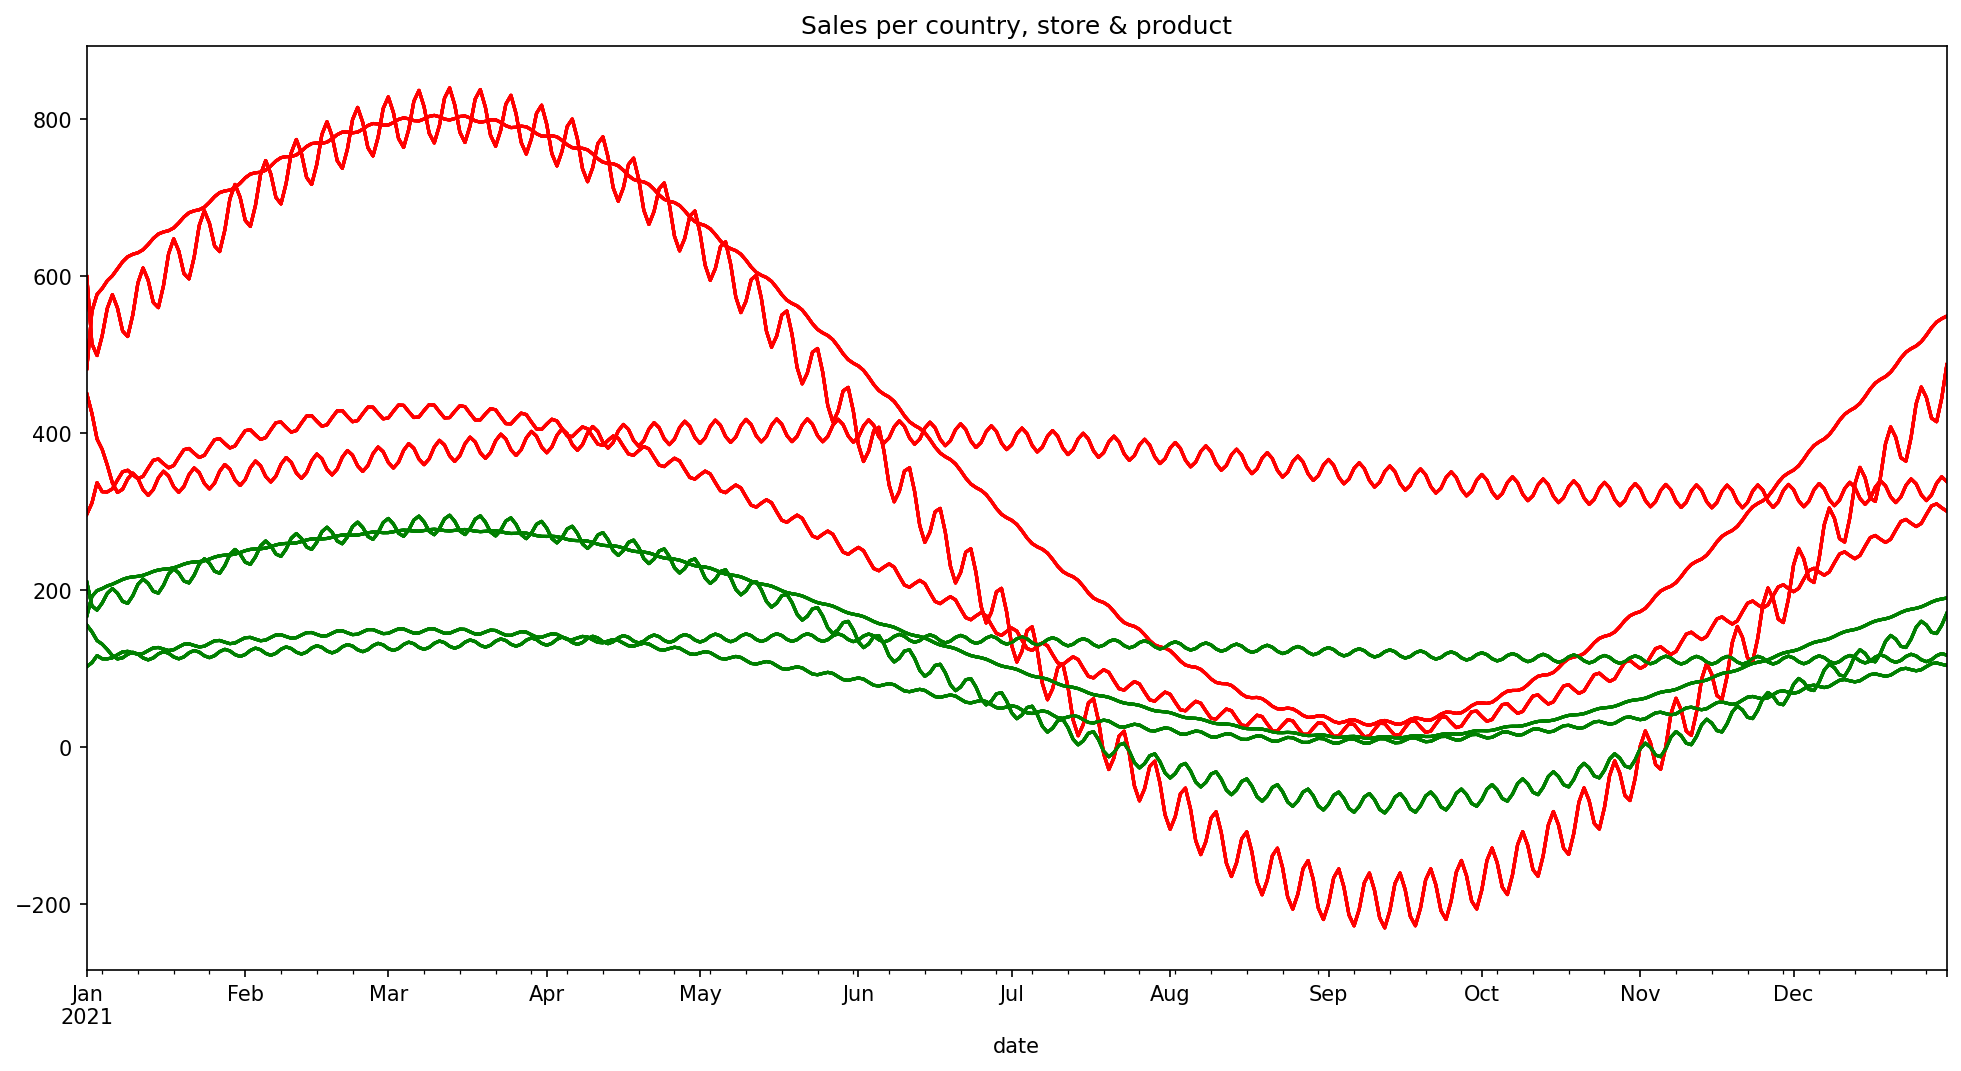

In [49]:
store_to_color = {}
stores = train_df["store"].unique()
colors = ["r", "g", "b", "c", "m", "y"]
for idx, store in enumerate(stores):
    store_to_color[store] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for fused_combination in fused_df.fused.unique():
    fused_df[fused_df['fused'] == fused_combination]['num_sold'].plot(label=fused_combination, c = store_to_color[fused_combination.split(" - ")[1]])
#plt.legend()
plt.title("Sales per country, store & product")
plt.xlabel("date")
plt.show()

💡 <b> As expected </b>
- The country does not have any influence after 2020.
- One can clearly recognise the 4 different products in the 2 different stores from 2020 onward.

##### Color by store and product

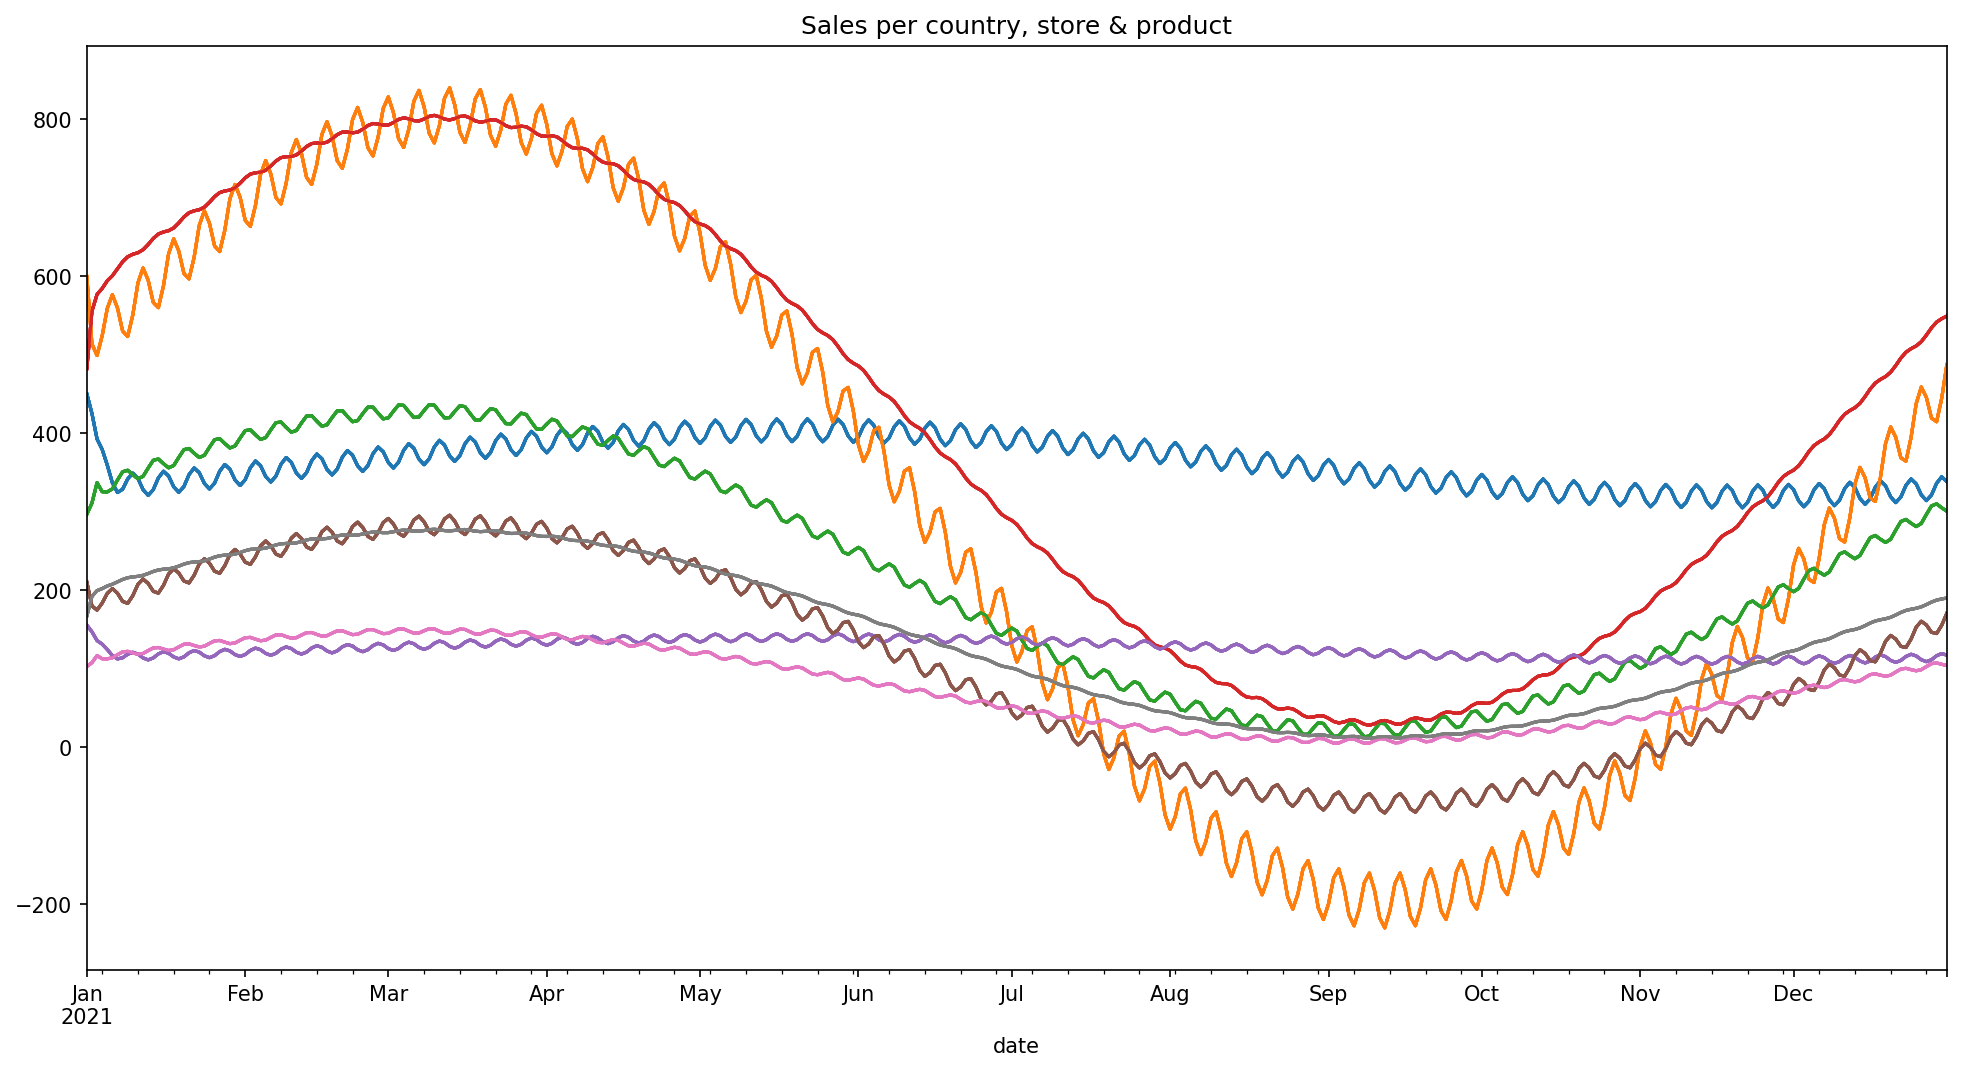

In [50]:
store_to_color = {}
stores = train_df["store"].unique()
products = train_df["product"].unique()
store_product_combinations = list()

for store in stores:
    for product in products:
        store_product_combinations.append(f"{store} - {product}")

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray"]
for idx, store_product in enumerate(store_product_combinations):
    store_to_color[store_product] = colors[idx]

plt.figure(figsize=(16, 8), dpi=150)
for fused_combination in fused_df.fused.unique():
    fused_df[fused_df['fused'] == fused_combination]['num_sold'].plot(label=fused_combination, c = store_to_color[fused_combination.split(" - ", 1)[1]])
#plt.legend()
plt.title("Sales per country, store & product")
plt.xlabel("date")
plt.show()

In [51]:
# Zoom in on 2020
fused_df.reset_index(inplace=True)
fused_df_2020 = fused_df[fused_df["date"] > pd.Timestamp("2019-12-30")]
fused_df_2020.set_index('date', inplace=True)

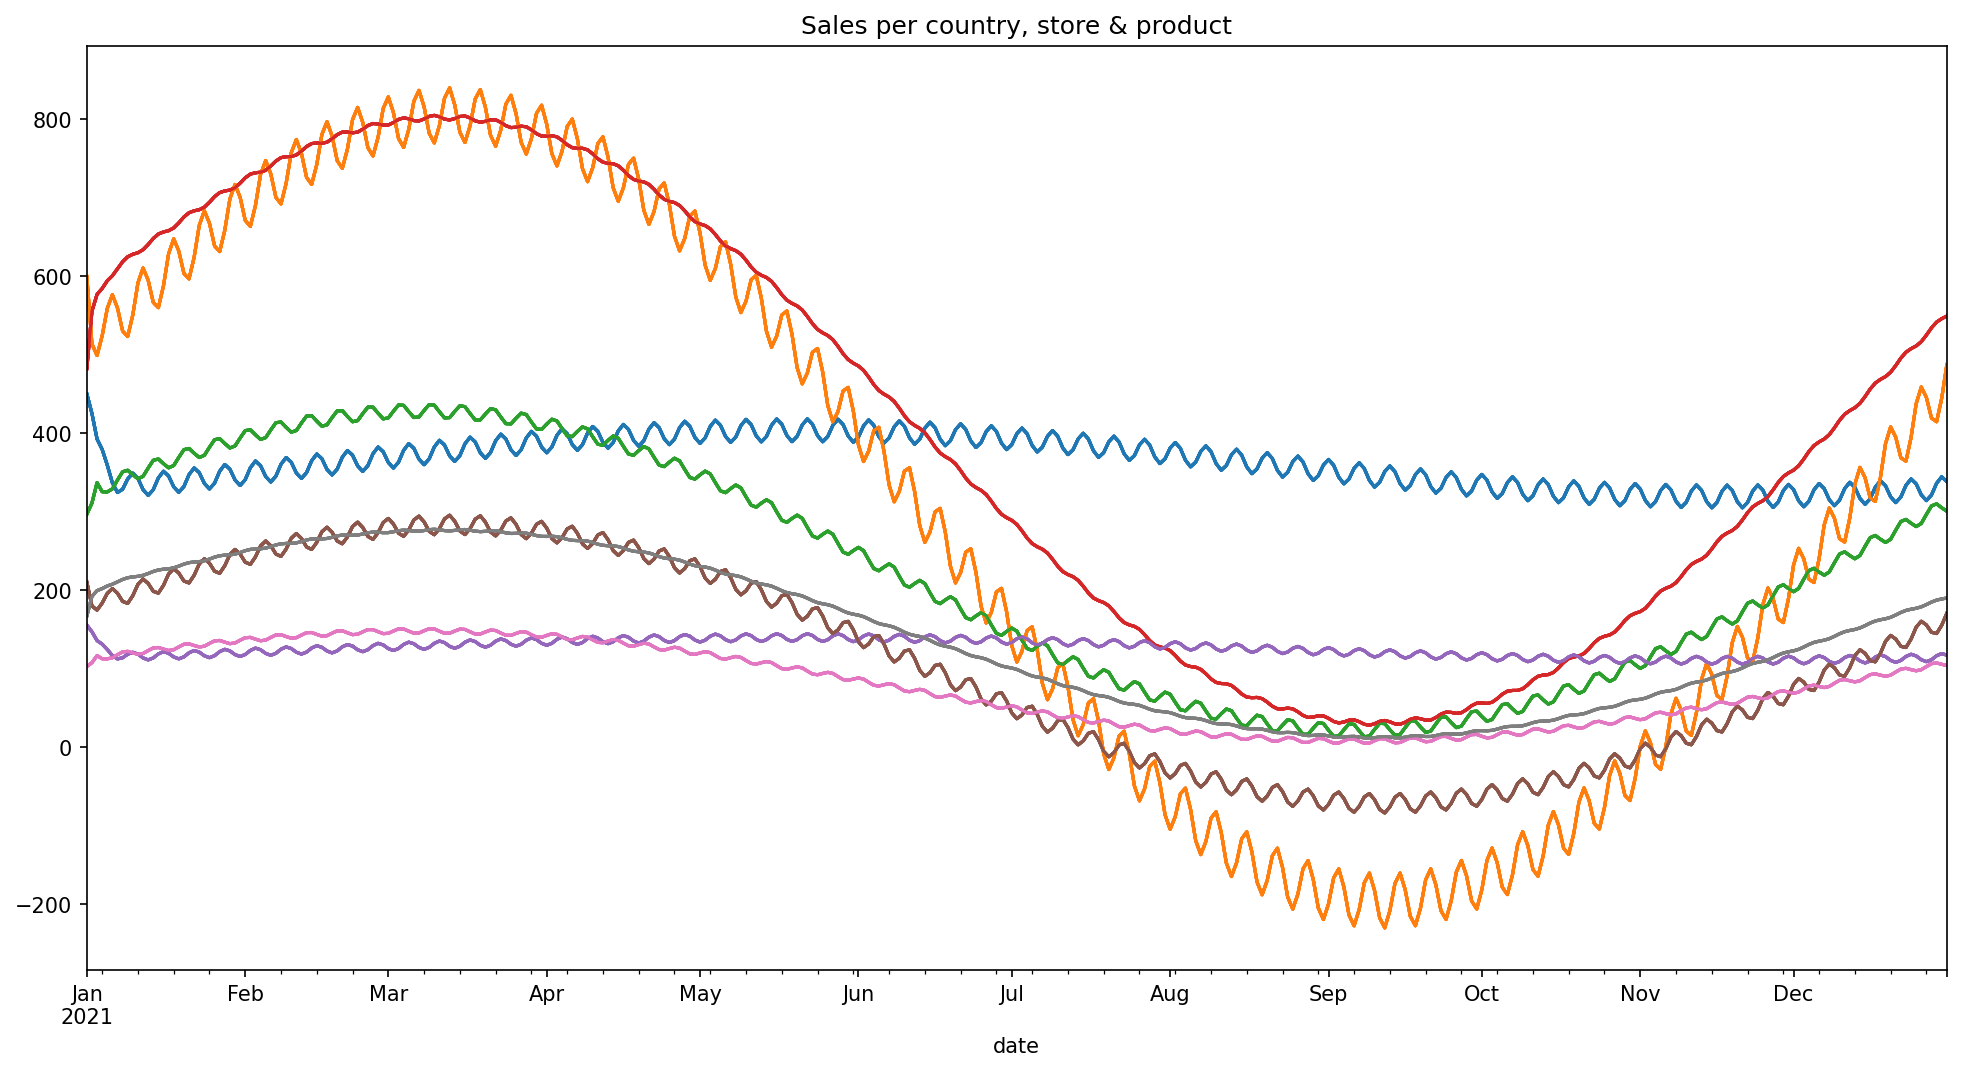

In [52]:
plt.figure(figsize=(16, 8), dpi=150)
for fused_combination in fused_df_2020.fused.unique():
    fused_df_2020[fused_df_2020['fused'] == fused_combination]['num_sold'].plot(label=fused_combination, c = store_to_color[fused_combination.split(" - ", 1)[1]])
#plt.legend()
plt.title("Sales per country, store & product")
plt.xlabel("date")
plt.show()


### Average over different countries and analyse freuqency spectrum

In [53]:
train_df.head()

row_id       date  country       store                           product  \
0       0 2017-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1       1 2017-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2       2 2017-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3       3 2017-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4       4 2017-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   

   num_sold  
0       663  
1       615  
2       480  
3       710  
4       240

In [56]:
store_product_df = test_df.groupby(['date','store','product']).agg({
    'num_sold': 'mean',
}).reset_index()
store_product_df.set_index('date', inplace=True)
# Fuse the two columns
store_product_df["fused"] = store_product_df["store"] + " - " + store_product_df["product"]
#store_product_df.drop(["store", "product"], axis=1, inplace=True)
store_product_df.head(10)

store                           product    num_sold  \
date                                                                   
2021-01-01  KaggleMart        Kaggle Advanced Techniques  449.945574   
2021-01-01  KaggleMart            Kaggle Getting Started  599.222799   
2021-01-01  KaggleMart                Kaggle Recipe Book  296.455491   
2021-01-01  KaggleMart  Kaggle for Kids: One Smart Goose  482.116144   
2021-01-01  KaggleRama        Kaggle Advanced Techniques  155.440235   
2021-01-01  KaggleRama            Kaggle Getting Started  210.138255   
2021-01-01  KaggleRama                Kaggle Recipe Book  102.588279   
2021-01-01  KaggleRama  Kaggle for Kids: One Smart Goose  166.937102   
2021-01-02  KaggleMart        Kaggle Advanced Techniques  424.893900   
2021-01-02  KaggleMart            Kaggle Getting Started  513.509560   

                                                    fused  
date                                                       
2021-01-01        KaggleMart - Kaggle Advanced Techniques  
2021-01-01            KaggleMart - Kaggle Getting Started  
2021-01-01                KaggleMart - Kaggle Recipe Book  
2021-01-01  KaggleMart - Kaggle for Kids: One Smart Goose  
2021-01-01        KaggleRama - Kaggle Advanced Techniques  
2021-01-01            KaggleRama - Kaggle Getting Started  
2021-01-01                KaggleRama - Kaggle Recipe Book  
2021-01-01  KaggleRama - Kaggle for Kids: One Smart Goose  
2021-01-02        KaggleMart - Kaggle Advanced Techniques  
2021-01-02            KaggleMart - Kaggle Getting Started

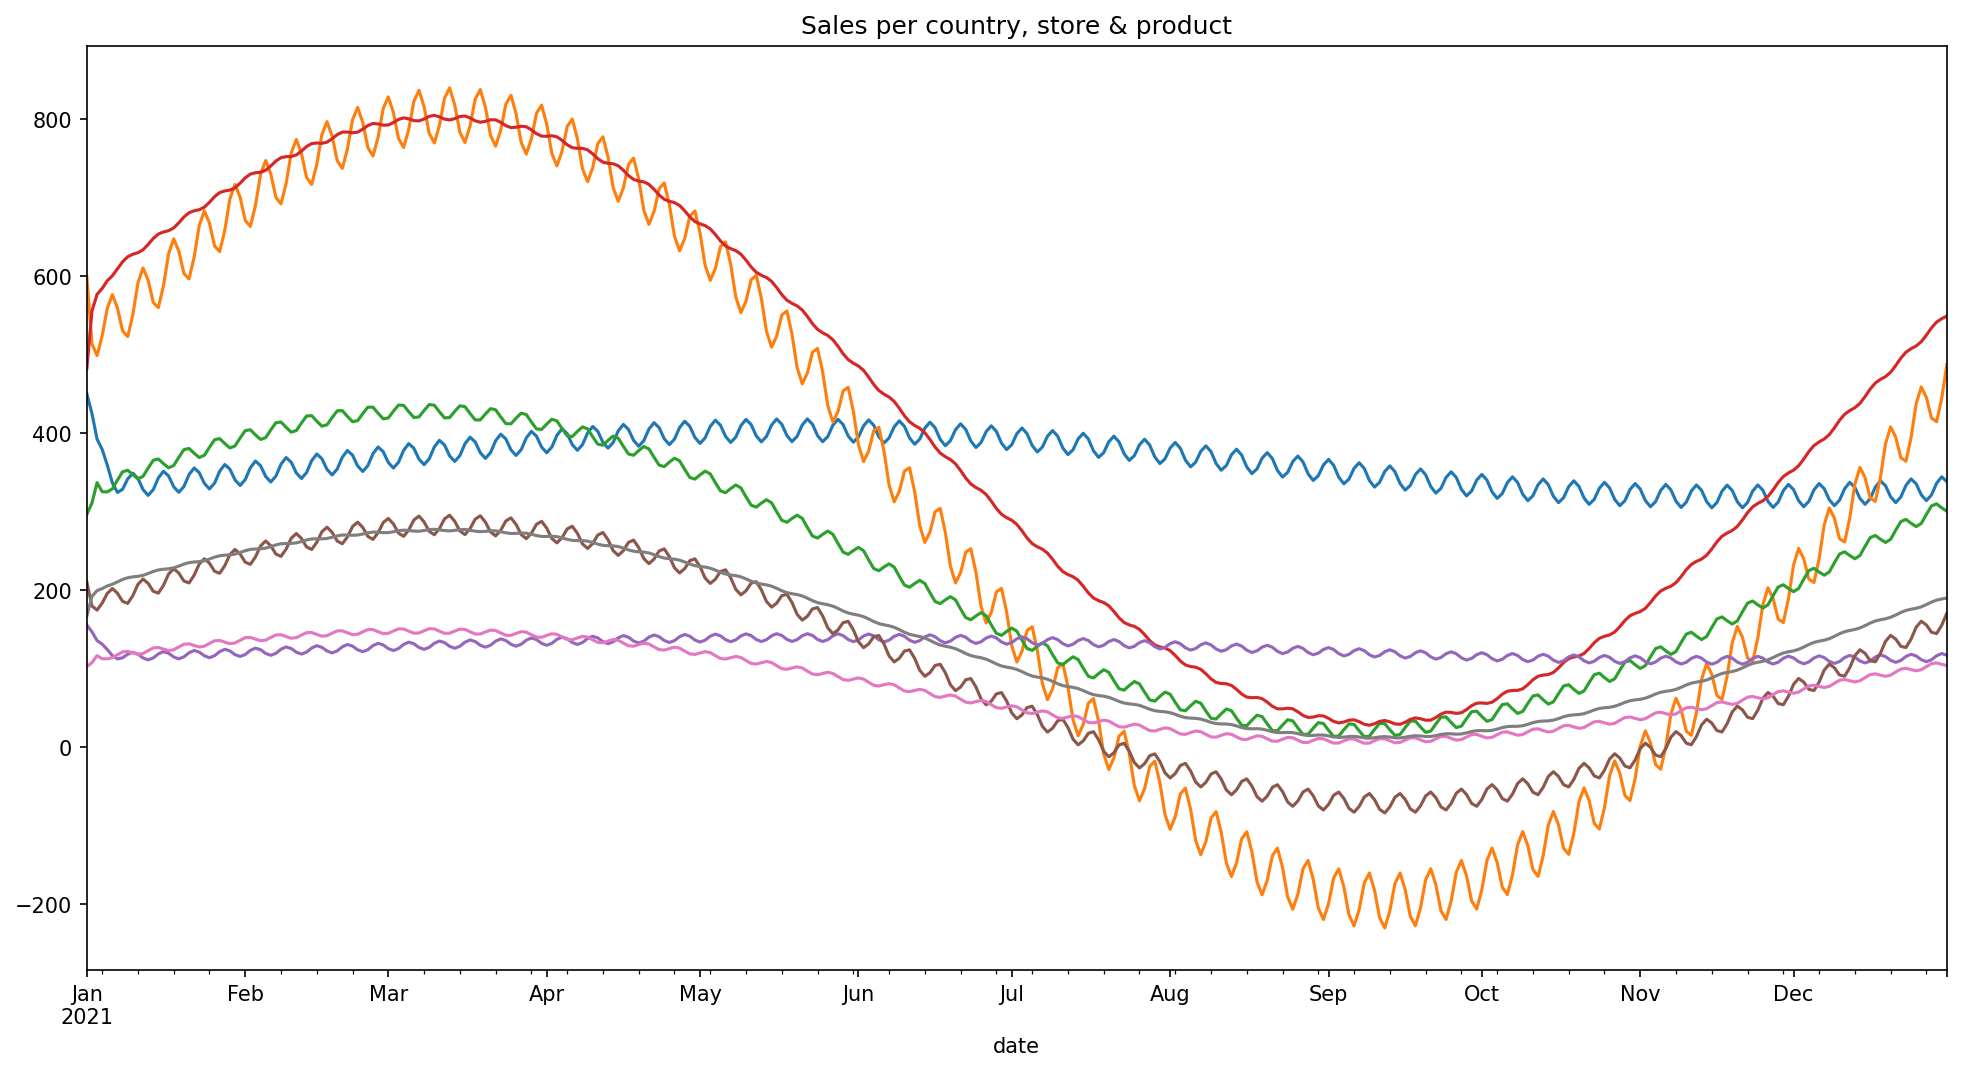

In [57]:
# Plot
plt.figure(figsize=(16, 8), dpi=150)
for fused_combination in store_product_df.fused.unique():
    store_product_df[store_product_df['fused'] == fused_combination]['num_sold'].plot(label=fused_combination, c = store_to_color[fused_combination])
#plt.legend()
plt.title("Sales per country, store & product")
plt.xlabel("date")
plt.show()

### Check Seasonality

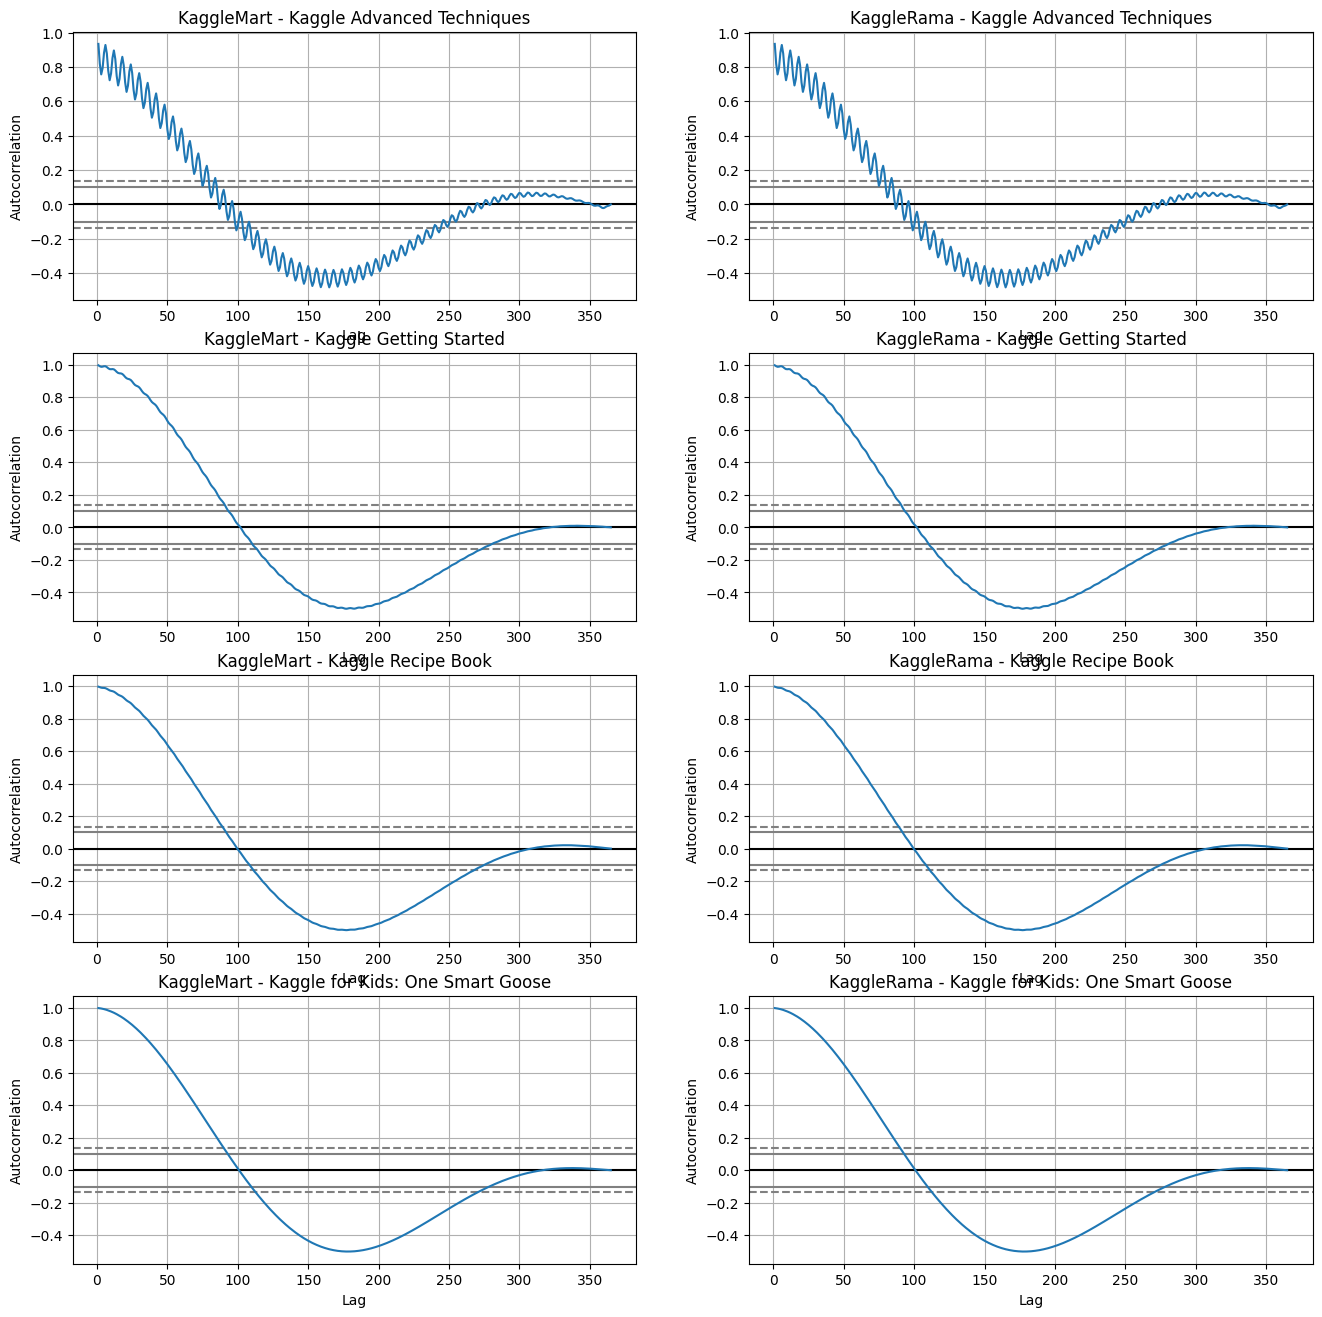

In [58]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

for idx, fused_combination in enumerate(store_product_df.fused.unique()):
    col = idx // 4
    if idx <= 3:
        row = idx 
    else:
        row = idx - 4

    axes[row][col].set_title(fused_combination)
    axes[row][col].set_xlabel('Lag')
    pd.plotting.autocorrelation_plot(store_product_df[store_product_df['fused'] == fused_combination]['num_sold'], ax=axes[row][col])
